<a href="https://colab.research.google.com/github/ghosucipto62-afk/LogisticRegressionHC/blob/main/analisaJessica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. IMPORT DAN UPLOAD DATA
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD DATA
df = pd.read_excel("kompetensi_digital2.xlsx")

# Identifikasi kolom skor 1–63
score_cols = [str(i) for i in range(1, 64)]

# Hitung skor total
df["Skor_Total"] = df[score_cols].sum(axis=1)


In [ ]:
df.head()

,Timestamp,Nama,Umur,Unit Kerja,Pendidikan Terakhir,1,2,3,4,5,...,55,56,57,58,59,60,61,62,63,Skor_Total
0,2025-11-17 11:17:46.925,Apid Sumarwan,> 50 Tahun,Business Support,Sarjana,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,314
1,2025-11-17 11:22:41.043,Wening Wulansari,> 50 Tahun,Business Support,Sarjana,4,5,5,5,4,...,4,4,4,4,4,4,4,4,5,275
2,2025-11-17 11:25:48.366,Ida Romauli Silaen,41 - 50 Tahun,Consumer Loan,Magister,5,5,5,5,5,...,4,4,4,5,5,5,5,5,5,303
3,2025-11-17 11:38:57.007,Rahmat,> 50 Tahun,Business Support,Magister,5,5,5,5,5,...,3,4,4,5,5,4,4,4,5,271
4,2025-11-17 11:40:45.756,Irsan,> 50 Tahun,Business Support,Sarjana,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,314


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ===============================
# 3. DATA PREPARATION
# ===============================
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Ambil kolom skor dari 1 sampai 63
score_cols = [str(i) for i in range(1, 64)]
df_scores = df[score_cols].apply(pd.to_numeric, errors='coerce')

# Hitung total skor
df['Total_Skor'] = df_scores.sum(axis=1)

# Encode kategori untuk analisis regresi & cluster
df['Umur_enc'] = LabelEncoder().fit_transform(df['Umur'])
df['Unit_enc'] = LabelEncoder().fit_transform(df['Unit Kerja'])
df['Pendidikan_enc'] = LabelEncoder().fit_transform(df['Pendidikan Terakhir'])

In [ ]:
# ===============================
# 4. T-TEST (Contoh: Sarjana vs Non-Sarjana)
# ===============================
group1 = df[df['Pendidikan Terakhir'] == 'Sarjana']['Total_Skor']
group2 = df[df['Pendidikan Terakhir'] != 'Sarjana']['Total_Skor']

ttest_result = stats.ttest_ind(group1, group2, equal_var=False)
print("===== T-TEST: Sarjana vs Non-Sarjana =====")
print(ttest_result)

===== T-TEST: Sarjana vs Non-Sarjana =====
TtestResult(statistic=np.float64(-1.671437251932709), pvalue=np.float64(0.10191062188866104), df=np.float64(42.92834001656568))


In [ ]:
# ===============================
# 5. ONE-WAY ANOVA
#    Contoh: ANOVA berdasarkan Unit Kerja
# ===============================
anova_groups = [group["Total_Skor"].values
                 for name, group in df.groupby("Unit Kerja")]

anova_result = stats.f_oneway(*anova_groups)
print("\n===== ANOVA: Unit Kerja =====")
print(anova_result)



===== ANOVA: Unit Kerja =====
F_onewayResult(statistic=np.float64(1.8670225294002842), pvalue=np.float64(0.042067396610507984))


In [ ]:
# ===============================
# 6. REGRESI LINEAR
#    Total_Skor ~ Umur + Unit Kerja + Pendidikan
# ===============================
model = smf.ols(
    "Total_Skor ~ Umur_enc + Unit_enc + Pendidikan_enc",
    data=df
).fit()

print("\n===== REGRESI LINEAR =====")
print(model.summary())



===== REGRESI LINEAR =====
                            OLS Regression Results                            
Dep. Variable:             Total_Skor   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.649
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0521
Time:                        12:52:01   Log-Likelihood:                -572.80
No. Observations:                 121   AIC:                             1154.
Df Residuals:                     117   BIC:                             1165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       

In [ ]:
# ===============================
# 7. CLUSTERING (K-Means)
# ===============================
# Standarisasi skor
scaler = StandardScaler()
scaled = scaler.fit_transform(df_scores)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

print("\n===== JUMLAH ANGGOTA CLUSTER =====")
print(df['Cluster'].value_counts())


===== JUMLAH ANGGOTA CLUSTER =====
Cluster
0    49
1    38
2    34
Name: count, dtype: int64


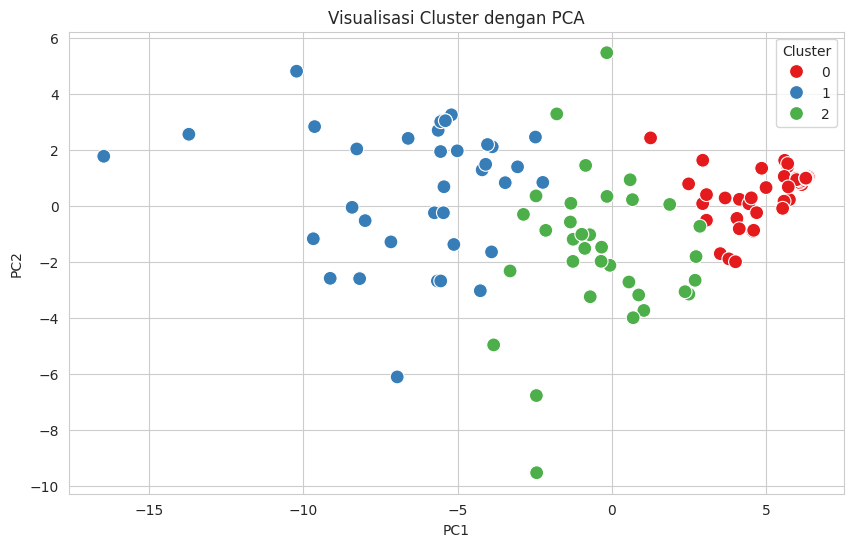

In [ ]:
# ===============================
# 8. VISUALISASI CLUSTER DENGAN PCA (2D)
# ===============================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=df,
    palette='Set1',
    s=100
)
plt.title("Visualisasi Cluster dengan PCA")
plt.show()

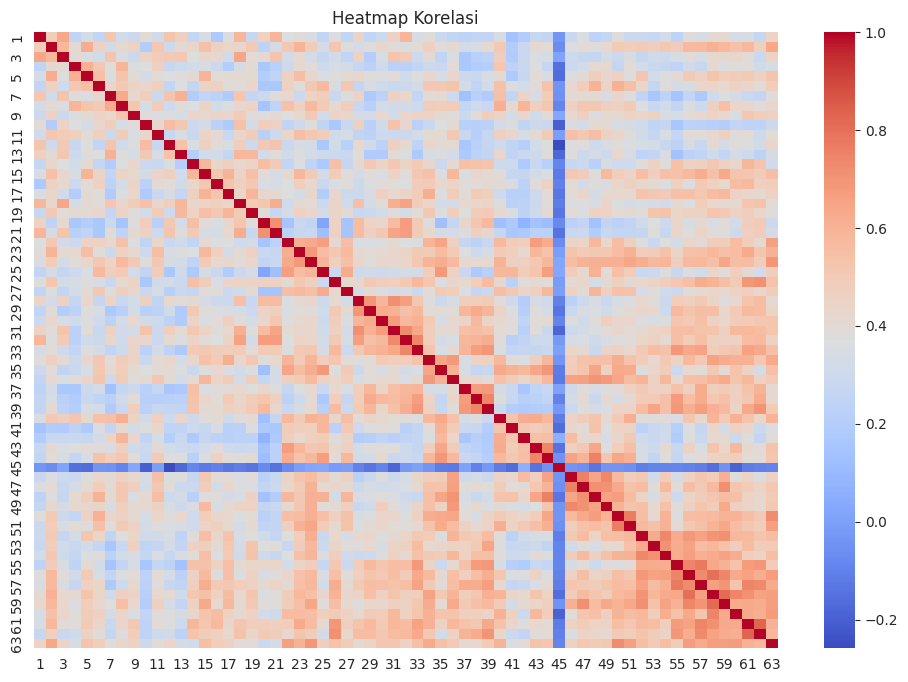

In [ ]:
# ===============================
# 9. HEATMAP KORELASI
# ===============================
plt.figure(figsize=(12, 8))
corr = df_scores.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

In [ ]:
pip install reportlab plotly statsmodels scikit-learn pandas seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00


In [ ]:
# =======================================
# 1. IMPORT LIBRARIES
# =======================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.multivariate.manova as manova
import statsmodels.formula.api as smf
import plotly.express as px
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4


In [ ]:
# =======================================
# 2. FUNCTION: Load data
# =======================================
def load_data(file_path):
    df = pd.read_excel(file_path)
    # Clean column names by stripping whitespace right after loading
    df.columns = df.columns.str.strip()
    score_cols = [str(i) for i in range(1, 64)]
    df_scores = df[score_cols].apply(pd.to_numeric, errors='coerce')
    df['Total_Skor'] = df_scores.sum(axis=1)

    # Encoding categorical variables
    df['Umur_enc'] = LabelEncoder().fit_transform(df['Umur'])
    df['Unit_enc'] = LabelEncoder().fit_transform(df['Unit Kerja'])
    df['Pendidikan_enc'] = LabelEncoder().fit_transform(df['Pendidikan Terakhir'])

    return df, df_scores

In [ ]:
# =======================================
# 3. FUNCTION: T-TEST
# =======================================
def run_ttest(df, category, cat1, cat2):
    group1 = df[df[category] == cat1]['Total_Skor']
    group2 = df[df[category] == cat2]['Total_Skor']
    result = stats.ttest_ind(group1, group2, equal_var=False)
    return result


In [ ]:
# =======================================
# 4. FUNCTION: ANOVA
# =======================================
def run_anova(df, category):
    groups = [g['Total_Skor'] for name, g in df.groupby(category)]
    return stats.f_oneway(*groups)


In [ ]:
# =======================================
# 5. FUNCTION: REGRESSION MODEL
# =======================================
def run_regression(df):
    model = smf.ols("Total_Skor ~ Umur_enc + Unit_enc + Pendidikan_enc", data=df).fit()
    return model


In [ ]:
# =======================================
# 5. FUNCTION: MANOVA
# =======================================
def run_manova(df):
    # Gunakan 5 indikator sebagai contoh
    formula = "Total_Skor + Umur_enc ~ Unit_enc + Pendidikan_enc"
    mv_test = manova.MANOVA.from_formula(formula, data=df)
    return mv_test.mv_test()


In [ ]:
# =======================================
# 6. FUNCTION: CLUSTERING
# =======================================
def run_clustering(df_scores, n_clusters=3):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df_scores)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled)

    silhouette = silhouette_score(scaled, clusters)

    return clusters, silhouette, scaled


In [ ]:
# =======================================
# 7. FUNCTION: PCA VISUALIZATION (Plotly)
# =======================================
def visualize_pca(df, scaled):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled)

    df['PC1'] = pca_data[:, 0]
    df['PC2'] = pca_data[:, 1]

    fig = px.scatter(
        df, x='PC1', y='PC2', color='Cluster',
        title="Visualisasi Cluster dengan PCA 2D",
        hover_data=['Total_Skor']
    )
    fig.show()


In [ ]:
# =======================================
#8.  FUNCTION: DASHBOARD SUMMARY
# =======================================
def dashboard(df):
    fig = px.box(df, x="Unit Kerja", y="Total_Skor", color="Unit Kerja",
                 title="Perbandingan Total Skor per Unit Kerja")
    fig.show()

    fig2 = px.histogram(df, x="Total_Skor", nbins=30,
                        title="Distribusi Total Skor Kompetensi Digital")
    fig2.show()


In [ ]:
# =======================================
# FUNCTION: GENERATE PDF REPORT
# =======================================
def generate_pdf(ttest, anova, regression, silhouette, filename="Laporan_Analisis.pdf"):
    styles = getSampleStyleSheet()
    doc = SimpleDocTemplate(filename, pagesize=A4)
    story = []

    story.append(Paragraph("<b>LAPORAN ANALISIS STATISTIK KOMPETENSI DIGITAL</b>", styles['Title']))
    story.append(Spacer(1, 20))

    story.append(Paragraph("<b>1. Hasil T-Test</b>", styles['Heading2']))
    story.append(Paragraph(str(ttest), styles['Normal']))
    story.append(Spacer(1, 12))

    story.append(Paragraph("<b>2. Hasil ANOVA</b>", styles['Heading2']))
    story.append(Paragraph(str(anova), styles['Normal']))
    story.append(Spacer(1, 12))

    story.append(Paragraph("<b>3. Hasil Regresi Linear</b>", styles['Heading2']))
    story.append(Paragraph(str(regression.summary()), styles['Normal']))
    story.append(Spacer(1, 12))

    story.append(Paragraph("<b>4. Silhouette Score Clustering</b>", styles['Heading2']))
    story.append(Paragraph(str(silhouette), styles['Normal']))

    doc.build(story)
    print("PDF berhasil dibuat:", filename)


In [ ]:
# =======================================
# RUN ALL MODULES
# =======================================

# Ensure the file is on disk if uploaded
import os
# The 'google.colab.files' module is imported if needed for other functionality,
# but direct reliance on 'files.uploaded' for checking file existence is removed.

file_name = "kompetensi_digital2.xlsx" # Changed to the file confirmed to be available

# 1. Load data
df, df_scores = load_data(file_name)

# 2. T-Test (Sarjana vs Non Sarjana)
ttest = run_ttest(df, "Pendidikan Terakhir", "Sarjana", "SMA")

# 3. ANOVA (Unit Kerja)
anova = run_anova(df, "Unit Kerja")

# 4. Regresi
regression = run_regression(df)

# 5. MANOVA
manova_result = run_manova(df)
print(manova_result)

# 6. Clustering
clusters, silhouette, scaled = run_clustering(df_scores, n_clusters=3)
df['Cluster'] = clusters
print("Silhouette Score:", silhouette)

# 7. Dashboard
dashboard(df)

# 8. PCA Visualization
visualize_pca(df, scaled)

# 9. Generate PDF Report
generate_pdf(ttest, anova, regression, silhouette)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1185 2.0000 117.0000 435.2054 0.0000
         Pillai's trace 0.8815 2.0000 117.0000 435.2054 0.0000
 Hotelling-Lawley trace 7.4394 2.0000 117.0000 435.2054 0.0000
    Roy's greatest root 7.4394 2.0000 117.0000 435.2054 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Unit_enc        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9439 2.0000 117.0000  3.4741 0.0342
          Pillai's trace 0.0561 2.0000 117.0000  3.4741 0.0342
  Hotelling

PDF berhasil dibuat: Laporan_Analisis.pdf


# Task
Perform a comprehensive exploratory data analysis on the `kompetensi_digital2.xlsx` dataset by:
1.  Calculating and displaying descriptive statistics for numerical columns, especially 'Total_Skor', and value counts for categorical columns ('Umur', 'Unit Kerja', 'Pendidikan Terakhir').
2.  Checking for and reporting any missing values in the dataset.
3.  Visualizing the distribution of 'Total_Skor' using a box plot.
4.  Creating bar plots or count plots to show the distribution of observations across different categories for 'Umur', 'Unit Kerja', and 'Pendidikan Terakhir'.
5.  Analyzing the relationship between 'Total_Skor' and 'Umur', and 'Total_Skor' and 'Pendidikan Terakhir' using box plots or violin plots.

## Descriptive Statistics

### Subtask:
Calculate and display descriptive statistics for numerical columns, especially 'Total_Skor', and value counts for categorical columns like 'Umur', 'Unit Kerja', and 'Pendidikan Terakhir'.


**Reasoning**:
First, I'll display the descriptive statistics for the 'Total_Skor' column as requested. This will provide a summary of the central tendency, dispersion, and shape of the distribution of the score.



In [ ]:
print("\nDescriptive Statistics for Total_Skor:")
print(df['Total_Skor'].describe())


Descriptive Statistics for Total_Skor:
count    121.000000
mean     279.181818
std       28.559587
min      191.000000
25%      256.000000
50%      279.000000
75%      307.000000
max      315.000000
Name: Total_Skor, dtype: float64


**Reasoning**:
Now, I will display the value counts for the 'Umur' column to understand the distribution of respondents across different age groups.



In [ ]:
print("\nValue Counts for Umur:")
print(df['Umur'].value_counts())


Value Counts for Umur:
Umur
31 - 40 Tahun    57
41 - 50 Tahun    24
20 - 30 Tahun    22
> 50 Tahun       18
Name: count, dtype: int64


**Reasoning**:
Next, I will display the value counts for the 'Unit Kerja' column to see the distribution of respondents across different work units.



In [ ]:
print("\nValue Counts for Unit Kerja:")
print(df['Unit Kerja'].value_counts())


Value Counts for Unit Kerja:
Unit Kerja
Business Support                  19
TBW                               17
RBC                               16
RCF                               11
TBR                               11
Human Capital                     10
Legal                              8
Retail Funding & Personal Loan     6
Micro Banking                      6
Consumer Loan                      5
SME                                4
Credit Card                        3
Government                         3
Wealth Business                    2
Name: count, dtype: int64


**Reasoning**:
Finally, I will display the value counts for the 'Pendidikan Terakhir' column to understand the distribution of education levels among the respondents, completing the descriptive statistics part of the subtask.



In [ ]:
print("\nValue Counts for Pendidikan Terakhir:")
print(df['Pendidikan Terakhir'].value_counts())


Value Counts for Pendidikan Terakhir:
Pendidikan Terakhir
Sarjana     97
Magister    20
Diploma      4
Name: count, dtype: int64


**Reasoning**:
Next, I will check for and report any missing values in the dataset, which is the second instruction in the main task.



In [ ]:
print("\nMissing Values in the DataFrame:")
print(df.isnull().sum())


Missing Values in the DataFrame:
Timestamp              0
Nama                   0
Umur                   0
Unit Kerja             0
Pendidikan Terakhir    0
                      ..
Unit_enc               0
Pendidikan_enc         0
Cluster                0
PC1                    0
PC2                    0
Length: 75, dtype: int64


**Reasoning**:
Now, I will visualize the distribution of 'Total_Skor' using a box plot to understand its central tendency, spread, and identify any potential outliers, as specified in the third instruction.



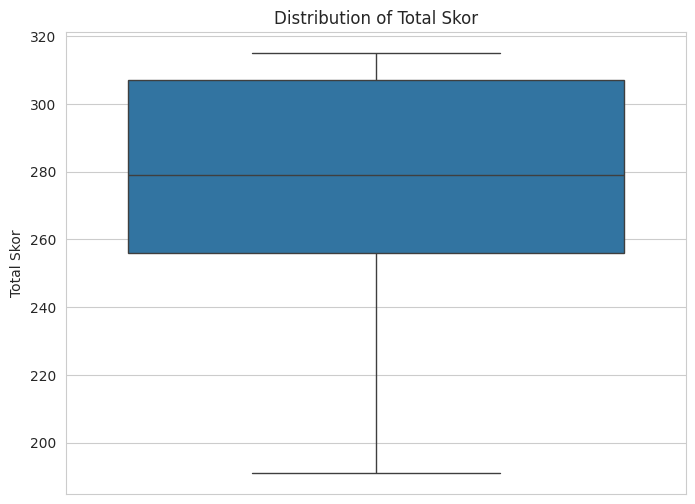

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total_Skor'])
plt.title('Distribution of Total Skor')
plt.ylabel('Total Skor')
plt.show()

**Reasoning**:
Next, I will create a count plot to visualize the distribution of observations across different categories for 'Umur', which is part of the fourth instruction.



/tmp/ipython-input-843241746.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




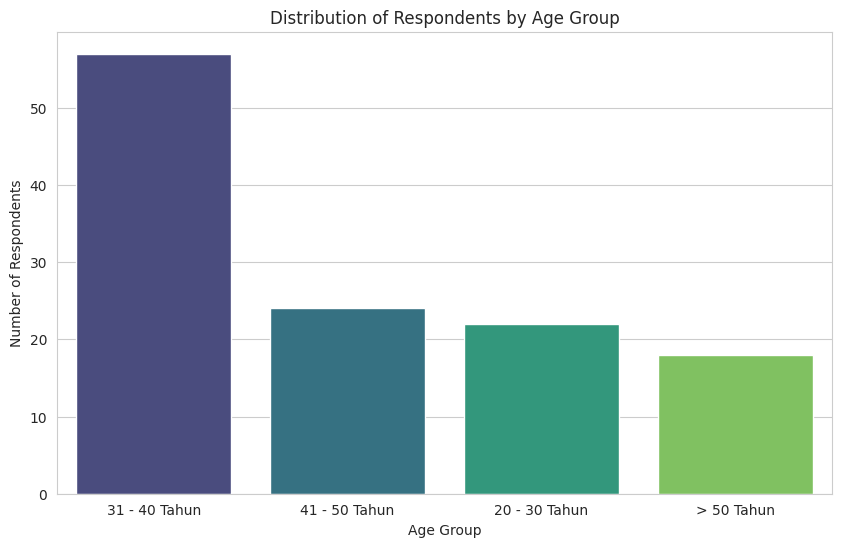

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Umur', data=df, palette='viridis', order=df['Umur'].value_counts().index)
plt.title('Distribution of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()

**Reasoning**:
The previous `countplot` generated a `FutureWarning` because `palette` was used without `hue`. To fix this, I will explicitly set `hue='Umur'` and `legend=False` to maintain the desired coloring and remove the warning.



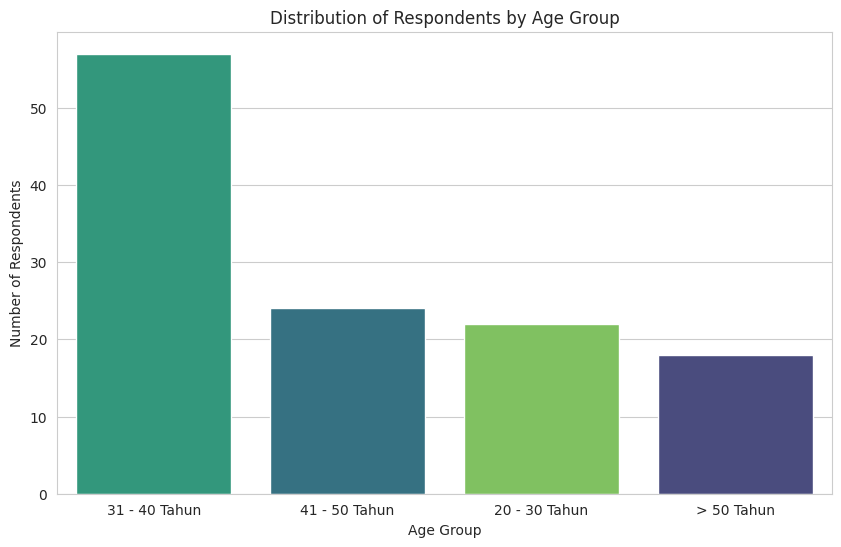

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Umur', data=df, palette='viridis', order=df['Umur'].value_counts().index, hue='Umur', legend=False)
plt.title('Distribution of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()

**Reasoning**:
Next, I will create a count plot to visualize the distribution of observations across different categories for 'Unit Kerja', which is part of the fourth instruction.



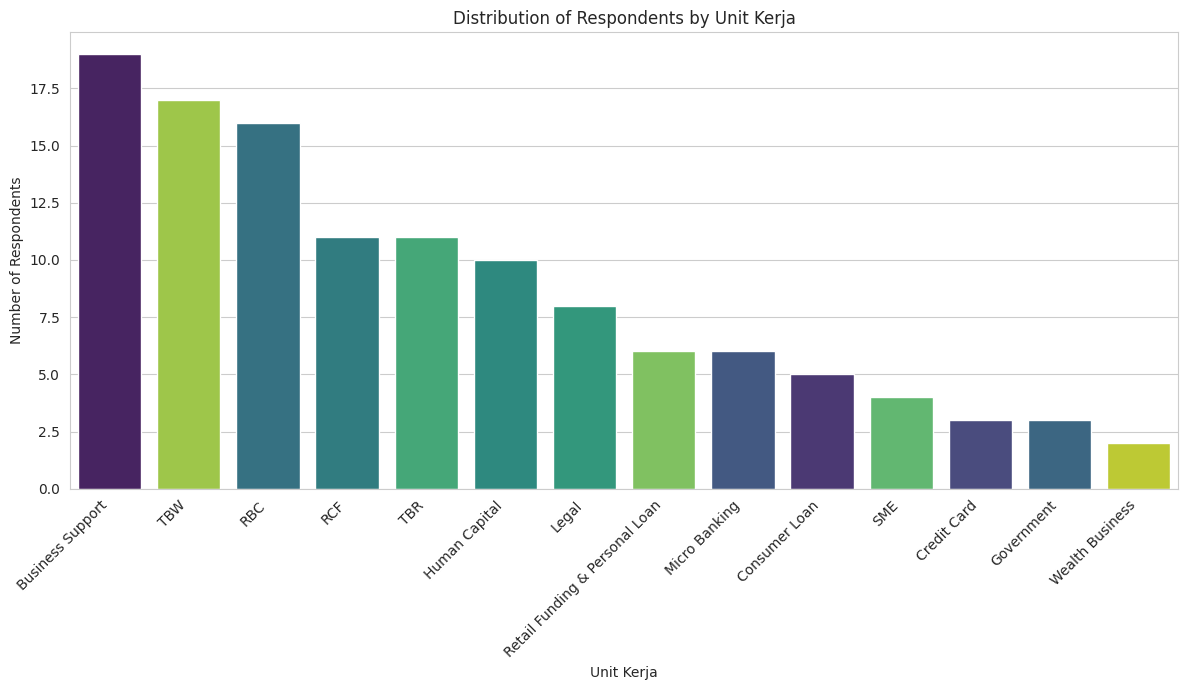

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Unit Kerja', data=df, palette='viridis', order=df['Unit Kerja'].value_counts().index, hue='Unit Kerja', legend=False)
plt.title('Distribution of Respondents by Unit Kerja')
plt.xlabel('Unit Kerja')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will create a count plot to visualize the distribution of observations across different categories for 'Pendidikan Terakhir', completing the fourth instruction.



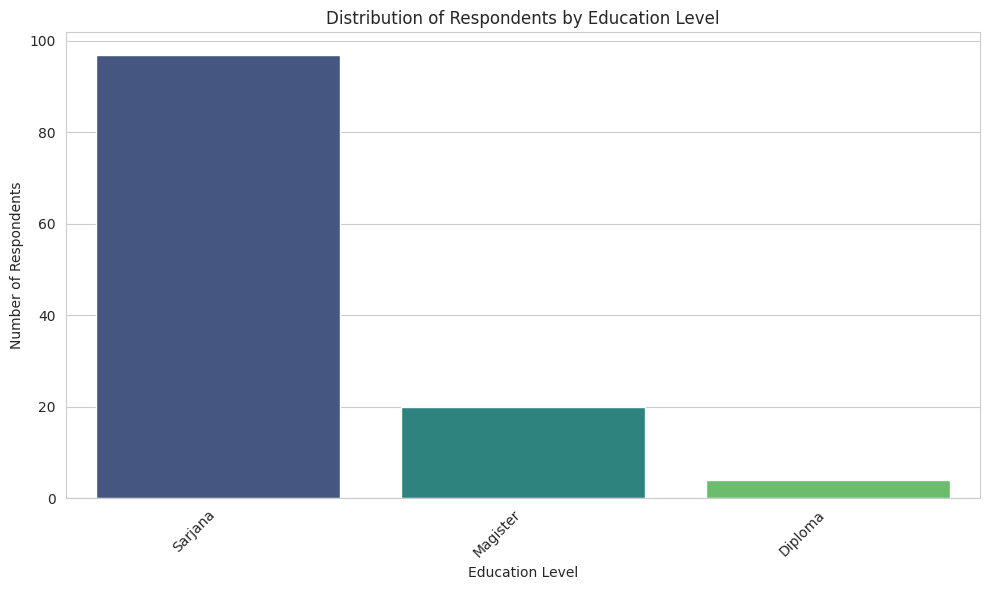

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pendidikan Terakhir', data=df, palette='viridis', order=df['Pendidikan Terakhir'].value_counts().index, hue='Pendidikan Terakhir', legend=False)
plt.title('Distribution of Respondents by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
I will now visualize the relationship between 'Total_Skor' and 'Umur' using a box plot to understand how the total score varies across different age groups, as per the fifth instruction.



/tmp/ipython-input-2073041150.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




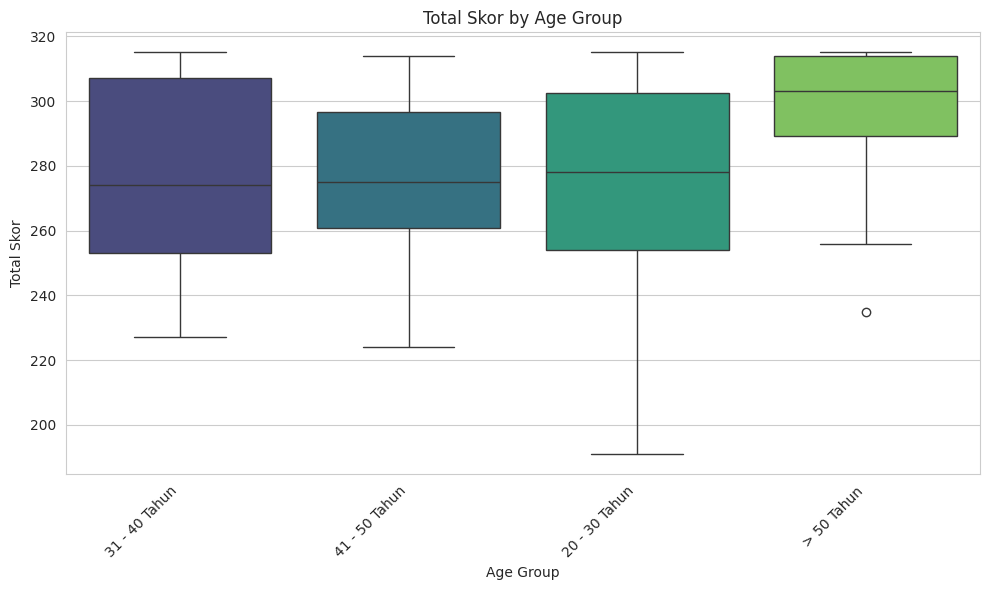

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Umur', y='Total_Skor', data=df, palette='viridis', order=df['Umur'].value_counts().index)
plt.title('Total Skor by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Skor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous `boxplot` generated a `FutureWarning` because `palette` was used without `hue`. To fix this, I will explicitly set `hue='Umur'` and `legend=False` to maintain the desired coloring and remove the warning.



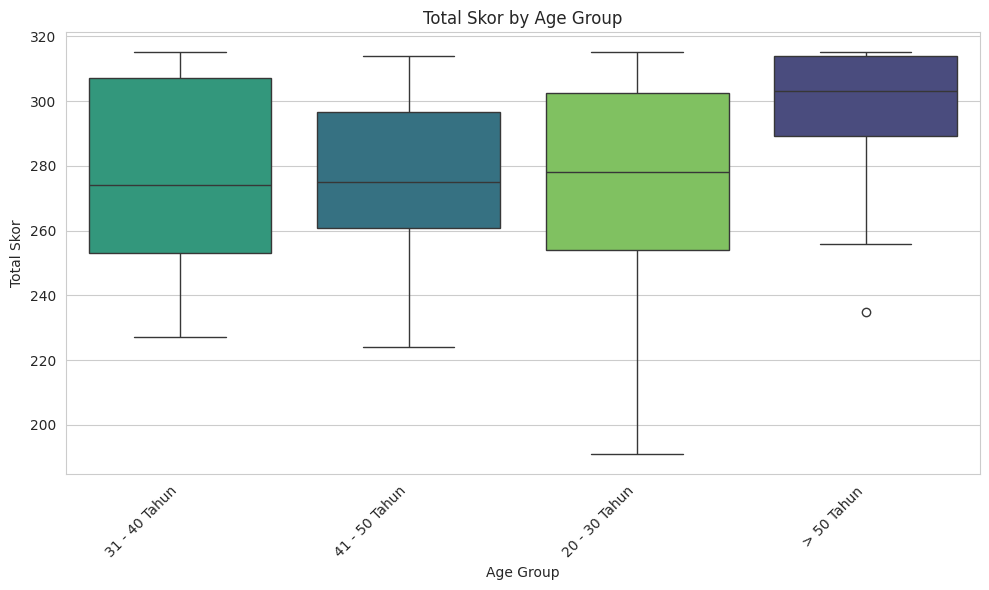

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Umur', y='Total_Skor', data=df, palette='viridis', order=df['Umur'].value_counts().index, hue='Umur', legend=False)
plt.title('Total Skor by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Skor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will visualize the relationship between 'Total_Skor' and 'Pendidikan Terakhir' using a box plot to understand how the total score varies across different education levels, as per the fifth instruction, completing the visualization requirements.



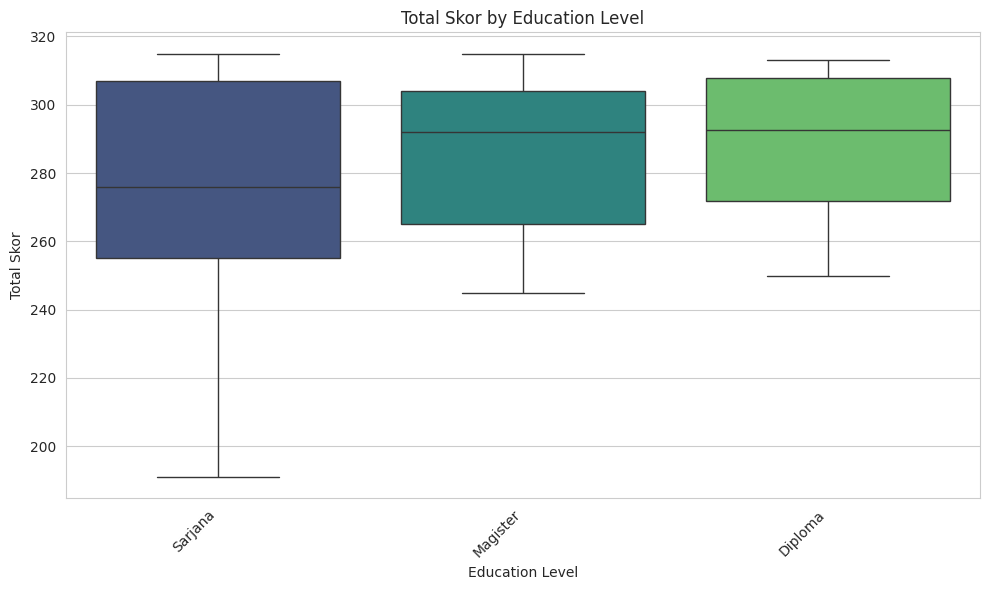

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pendidikan Terakhir', y='Total_Skor', data=df, palette='viridis', order=df['Pendidikan Terakhir'].value_counts().index, hue='Pendidikan Terakhir', legend=False)
plt.title('Total Skor by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Skor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   **Total_Skor Distribution**: The `Total_Skor` column, with 121 entries, has an average score of approximately 279.18, a standard deviation of 28.56, and ranges from 191 to 315. The median score is 279.
*   **Age Group Distribution**: The largest age group is "31 - 40 Tahun" with 57 respondents, followed by "41 - 50 Tahun" (24 respondents).
*   **Unit Kerja Distribution**: "Business Support" is the most represented unit with 19 respondents, followed by "TBW" (17 respondents) and "RBC" (16 respondents).
*   **Education Level Distribution**: The majority of respondents (97) hold a "Sarjana" degree, followed by "Magister" (20 respondents).
*   **Missing Values**: The dataset contains no missing values across any of its columns.
*   **Relationship between Total_Skor and Demographics**: Visualizations were successfully generated to show the distribution of `Total_Skor` across different age groups (`Umur`) and education levels (`Pendidikan Terakhir`), indicating potential variations in digital competency scores based on these demographic factors.

### Insights or Next Steps
*   **Targeted Training**: The significant representation of "Sarjana" degree holders and the "31 - 40 Tahun" age group suggests that training programs or interventions could be effectively tailored to these prominent demographics to further enhance overall digital competency.
*   **Further Investigation of Score Variation**: Explore the specific factors contributing to the observed variations in `Total_Skor` across different age groups and education levels, especially for groups with lower median scores or higher score dispersion, to identify areas for improvement.


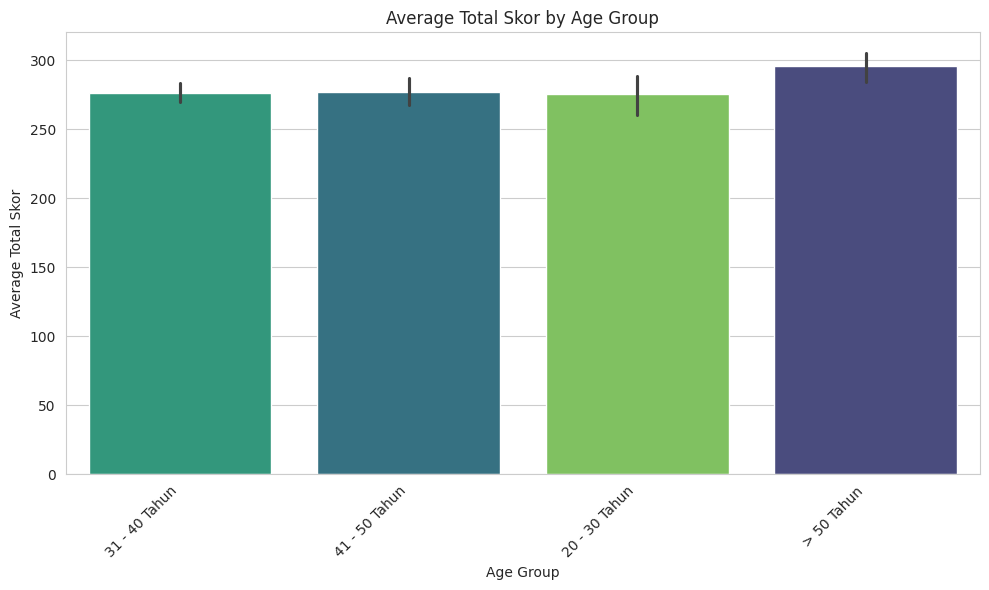

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Umur', y='Total_Skor', data=df, palette='viridis', estimator=np.mean, order=df['Umur'].value_counts().index, hue='Umur', legend=False)
plt.title('Average Total Skor by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Skor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

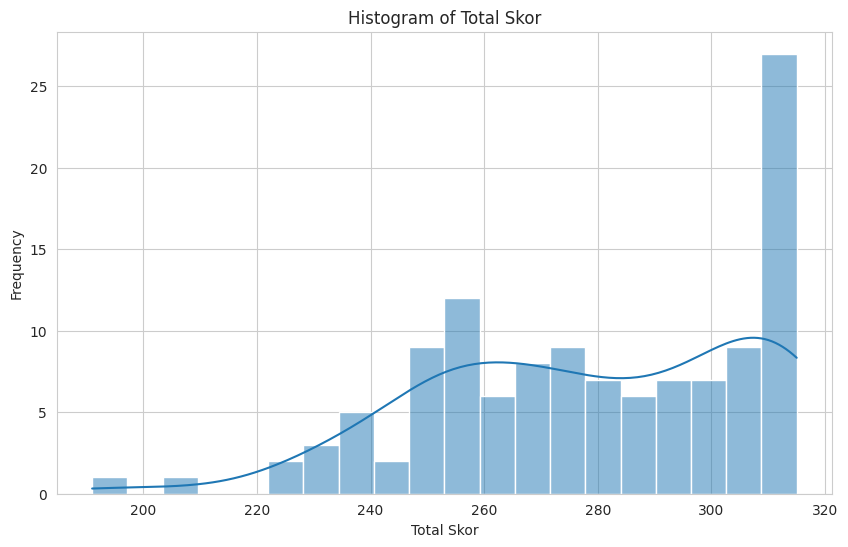

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Skor'], kde=True, bins=20)
plt.title('Histogram of Total Skor')
plt.xlabel('Total Skor')
plt.ylabel('Frequency')
plt.show()

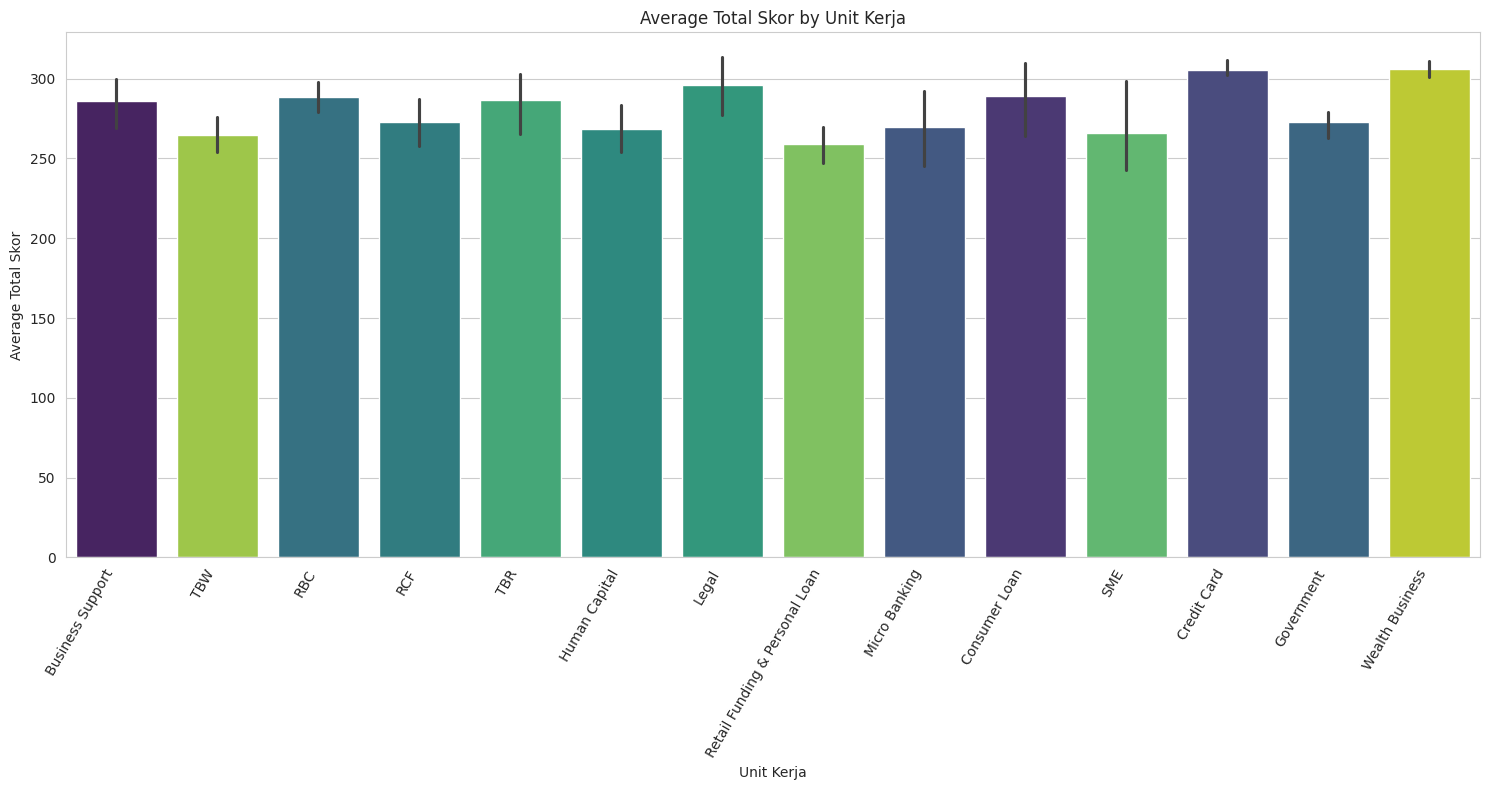

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Unit Kerja', y='Total_Skor', data=df, palette='viridis', estimator=np.mean, order=df['Unit Kerja'].value_counts().index, hue='Unit Kerja', legend=False)
plt.title('Average Total Skor by Unit Kerja')
plt.xlabel('Unit Kerja')
plt.ylabel('Average Total Skor')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)): # Iterate through the upper triangle to avoid duplicates and self-correlation
        if abs(corr.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated score pairs (correlation > 0.8):")
    for pair in high_corr_pairs:
        print(f"  - Scores {pair[0]} and {pair[1]}: {pair[2]:.4f}")
else:
    print("No score pairs with correlation > 0.8 found.")

Highly correlated score pairs (correlation > 0.8):
  - Scores 58 and 59: 0.8150
  - Scores 61 and 62: 0.8315


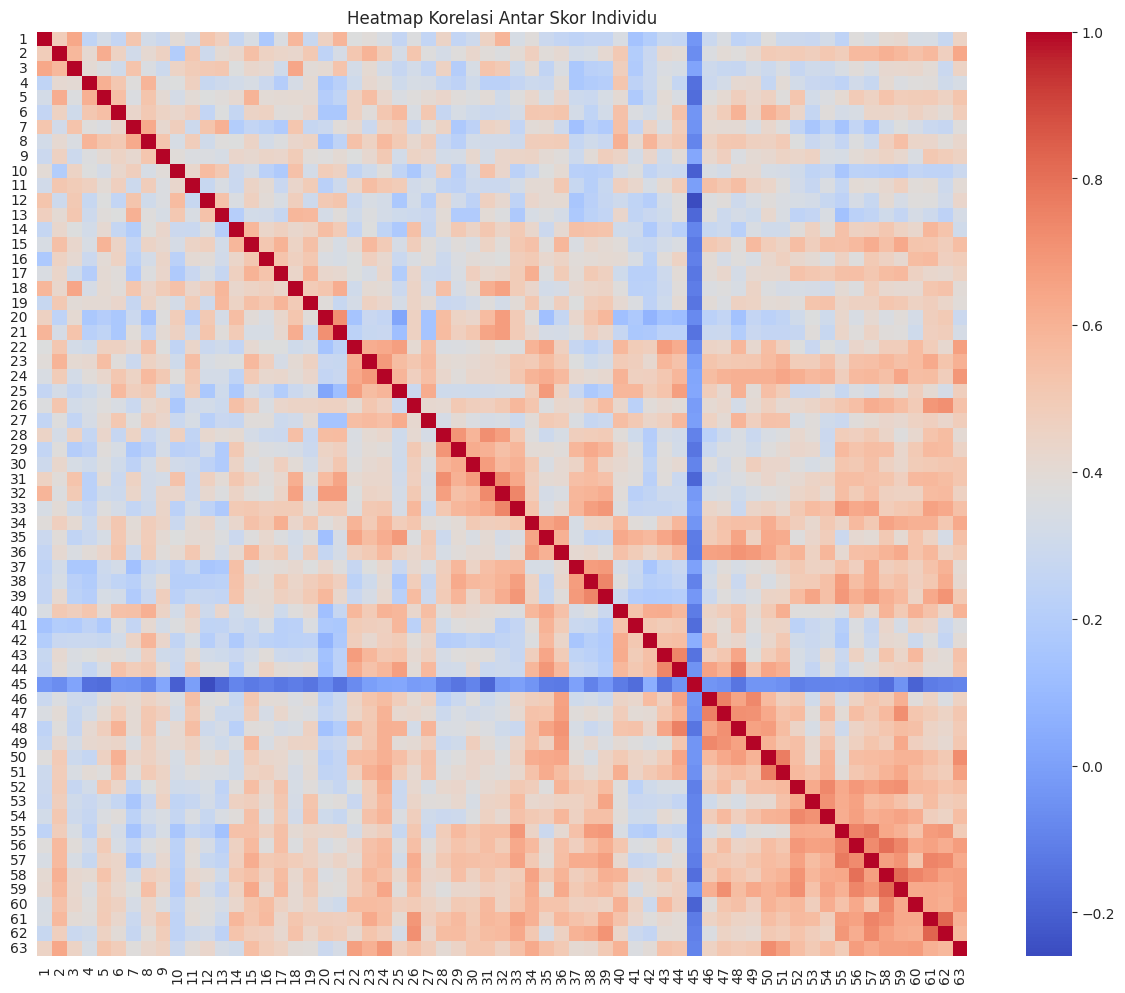

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Heatmap Korelasi Antar Skor Individu')
plt.show()

## Analisis Skor Per Indikator/Item

**Reasoning**: Untuk mengidentifikasi keterampilan digital spesifik yang masih lemah atau belum merata dikuasai, saya akan menghitung rata-rata skor untuk setiap item pertanyaan (dari 1 hingga 63). Item dengan skor rata-rata terendah akan mengindikasikan area kelemahan yang potensial. Ini akan membantu menjawab Tujuan Penelitian 2.

In [ ]:
# Calculate average score for each individual score item (1-63)
# 'df_scores' already contains only the score columns
average_item_scores = df_scores.mean().sort_values(ascending=True)

print("\nAverage Score per Individual Item (Lowest to Highest):")
print(average_item_scores.head(10)) # Display top 10 lowest scores
print("\nAverage Score per Individual Item (Highest to Lowest):")
print(average_item_scores.tail(10)) # Display top 10 highest scores


Average Score per Individual Item (Lowest to Highest):
39    3.991736
38    4.024793
20    4.033058
33    4.099174
32    4.157025
21    4.157025
52    4.165289
37    4.181818
17    4.198347
54    4.214876
dtype: float64

Average Score per Individual Item (Highest to Lowest):
45    4.669421
41    4.669421
11    4.669421
35    4.677686
22    4.685950
48    4.694215
6     4.710744
44    4.735537
43    4.743802
25    4.768595
dtype: float64


**Reasoning**: Setelah mengidentifikasi item-item dengan rata-rata skor terendah, saya akan memvisualisasikannya menggunakan bar chart untuk memberikan gambaran yang lebih jelas tentang keterampilan mana yang paling lemah.

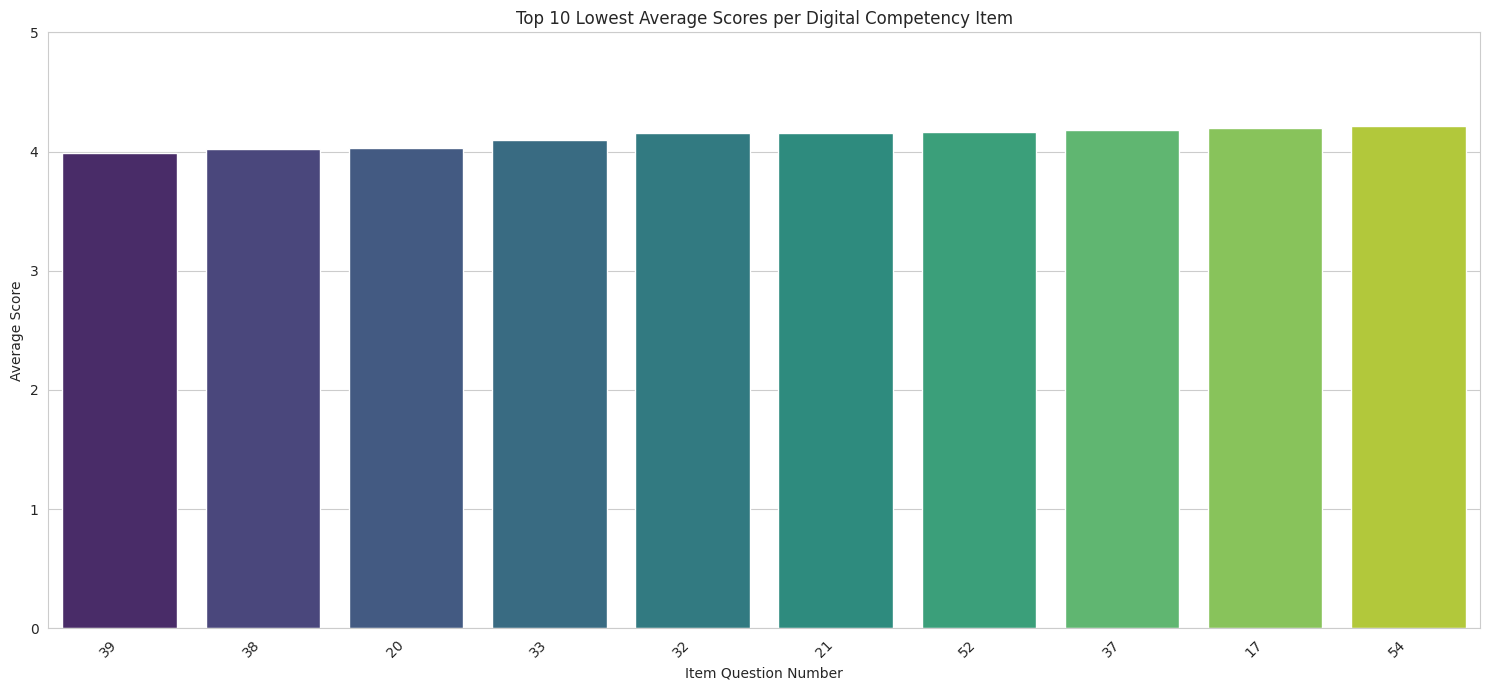

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=average_item_scores.head(10).index, y=average_item_scores.head(10).values, palette='viridis', hue=average_item_scores.head(10).index, legend=False)
plt.title('Top 10 Lowest Average Scores per Digital Competency Item')
plt.xlabel('Item Question Number')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis Per Competency Dimension

**Reasoning**: Using the provided structure of the 63 score columns, I will now group these scores into their respective 5 main digital competency variables (dimensions). I will calculate the average score for each dimension to understand the mastery level across these specific areas. This directly contributes to answering Research Objective 1.

In [ ]:
# Define the mapping of score columns to their respective competency dimensions
# Each sub-element has 3 questionnaire items.

competency_map = {
    'Information and data literacy': list(range(1, 10)),  # 1.1 (3 items), 1.2 (3 items), 1.3 (3 items)
    'Communication and collaboration': list(range(10, 28)), # 2.1 (3 items), 2.2 (3 items), 2.3 (3 items), 2.4 (3 items), 2.5 (3 items), 2.6 (3 items)
    'Digital content creation': list(range(28, 40)), # 3.1 (3 items), 3.2 (3 items), 3.3 (3 items), 3.4 (3 items)
    'Safety': list(range(40, 52)), # 4.1 (3 items), 4.2 (3 items), 4.3 (3 items), 4.4 (3 items)
    'Problem solving': list(range(52, 64)) # 5.1 (3 items), 5.2 (3 items), 5.3 (3 items), 5.4 (3 items)
}

# Adjust ranges to match 0-based indexing if necessary, or ensure they map correctly
# Based on the user's input, the columns are '1' through '63' as strings.
# Let's adjust the ranges to directly use the string column names.

competency_map_str = {
    'Information and data literacy': [str(i) for i in range(1, 10)],
    'Communication and collaboration': [str(i) for i in range(10, 28)],
    'Digital content creation': [str(i) for i in range(28, 40)],
    'Safety': [str(i) for i in range(40, 52)],
    'Problem solving': [str(i) for i in range(52, 64)]
}

# Calculate average score for each competency dimension
df_competency_scores = pd.DataFrame(columns=['Competency Dimension', 'Average Score'])

for dimension, cols in competency_map_str.items():
    # Ensure all columns exist before calculating mean
    existing_cols = [col for col in cols if col in df.columns]
    if existing_cols:
        avg_score = df[existing_cols].mean(axis=1).mean() # Mean of means for robustness
        df_competency_scores = pd.concat([
            df_competency_scores,
            pd.DataFrame([{'Competency Dimension': dimension, 'Average Score': avg_score}])
        ], ignore_index=True)

print("\nAverage Score per Competency Dimension:")
display(df_competency_scores)



Average Score per Competency Dimension:


/tmp/ipython-input-140362547.py:32: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Competency Dimension,Average Score
0,Information and data literacy,4.569330
1,Communication and collaboration,4.427456
2,Digital content creation,4.250689
3,Safety,4.613636
4,Problem solving,4.332645


**Reasoning**: Now I will visualize the average scores for each digital competency dimension using a bar chart to easily compare their relative strengths and weaknesses.

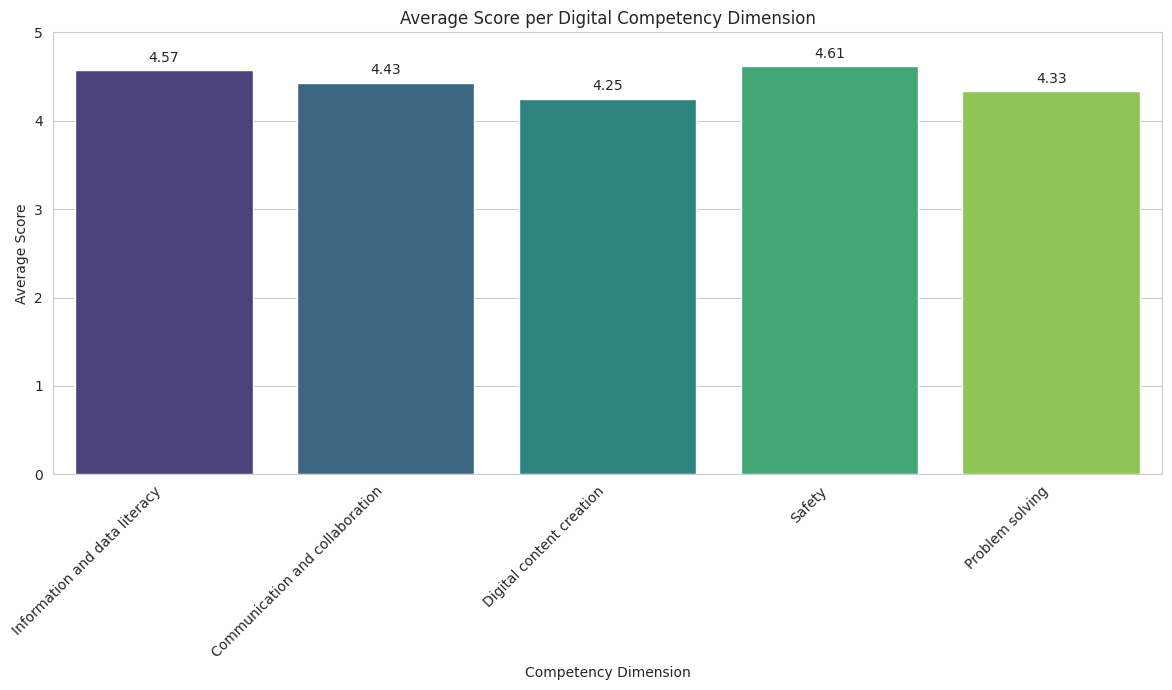

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Competency Dimension', y='Average Score', data=df_competency_scores, palette='viridis', hue='Competency Dimension', legend=False)
plt.title('Average Score per Digital Competency Dimension')
plt.xlabel('Competency Dimension')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5
plt.xticks(rotation=45, ha='right')

# Add numerical labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Analisis Faktor yang Mempengaruhi Skor 'Digital Content Creation'

**Reasoning**: Untuk memahami faktor-faktor demografi yang mempengaruhi skor 'Digital content creation', saya akan menghitung skor rata-rata dimensi ini untuk setiap responden dan kemudian menjalankan model regresi linear terpisah.

In [ ]:
# 1. Ekstrak kolom untuk 'Digital content creation' dari competency_map_str
digital_content_cols = competency_map_str['Digital content creation']

# 2. Pastikan semua kolom ada dan hitung rata-rata skor 'Digital content creation' per responden
existing_digital_content_cols = [col for col in digital_content_cols if col in df.columns]
if existing_digital_content_cols:
    df['Digital_Content_Creation_Score'] = df[existing_digital_content_cols].mean(axis=1)
else:
    print("Warning: Kolom untuk 'Digital content creation' tidak ditemukan di DataFrame.")

# 3. Jalankan model regresi linear baru
if 'Digital_Content_Creation_Score' in df.columns:
    model_dcc = smf.ols("Digital_Content_Creation_Score ~ Umur_enc + Unit_enc + Pendidikan_enc", data=df).fit()

    print("\n===== REGRESI LINEAR: Faktor yang Mempengaruhi 'Digital Content Creation' =====")
    print(model_dcc.summary())
else:
    print("Tidak dapat menjalankan regresi karena skor 'Digital content creation' tidak tersedia.")


===== REGRESI LINEAR: Faktor yang Mempengaruhi 'Digital Content Creation' =====
                                  OLS Regression Results                                  
Dep. Variable:     Digital_Content_Creation_Score   R-squared:                       0.046
Model:                                        OLS   Adj. R-squared:                  0.021
Method:                             Least Squares   F-statistic:                     1.865
Date:                            Tue, 02 Dec 2025   Prob (F-statistic):              0.139
Time:                                    13:29:05   Log-Likelihood:                -109.65
No. Observations:                             121   AIC:                             227.3
Df Residuals:                                 117   BIC:                             238.5
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
         

## Analisis Skor Item untuk Dimensi 'Communication and collaboration'

**Reasoning**: Untuk mengidentifikasi keterampilan spesifik yang lemah dalam dimensi 'Communication and collaboration', saya akan menghitung rata-rata skor untuk setiap item pertanyaan yang termasuk dalam dimensi ini dan memvisualisasikan item-item dengan skor terendah.

## Analisis Skor Per Sub-Elemen Kompetensi

**Reasoning**: Berdasarkan struktur detail yang diberikan, saya akan menghitung rata-rata skor untuk setiap sub-elemen kompetensi digital (misalnya 1.1, 1.2, 1.3, dst.) dan memvisualisasikannya dengan diagram batang. Ini akan memberikan wawasan yang sangat rinci tentang kekuatan dan kelemahan pada tingkat granular.

In [ ]:
# Define the mapping of score columns to their respective sub-competency elements
sub_competency_map = {
    '1.1 Browsing, searching and filtering': [str(i) for i in range(1, 4)],
    '1.2 Evaluating data, information': [str(i) for i in range(4, 7)],
    '1.3 Managing data, information': [str(i) for i in range(7, 10)],

    '2.1 Interacting through digital technologies': [str(i) for i in range(10, 13)],
    '2.2 Sharing information and content': [str(i) for i in range(13, 16)],
    '2.3 Engaging in citizenship': [str(i) for i in range(16, 19)],
    '2.4 Collaborating through digital technologies': [str(i) for i in range(19, 22)],
    '2.5 Netiquette': [str(i) for i in range(22, 25)],
    '2.6 Managing digital identity': [str(i) for i in range(25, 28)],

    '3.1 Developing digital content': [str(i) for i in range(28, 31)],
    '3.2 Integrating and re-elaborating': [str(i) for i in range(31, 34)],
    '3.3 Copyright and licences': [str(i) for i in range(34, 37)],
    '3.4 Programming': [str(i) for i in range(37, 40)],

    '4.1 Protecting devices': [str(i) for i in range(40, 43)],
    '4.2 Protecting personal data and privacy': [str(i) for i in range(43, 46)],
    '4.3 Protecting health and well-being': [str(i) for i in range(46, 49)],
    '4.4 Protecting the environment': [str(i) for i in range(49, 52)],

    '5.1 Solving technical problems': [str(i) for i in range(52, 55)],
    '5.2 Identifying needs and technological responses': [str(i) for i in range(55, 58)],
    '5.3 Creatively using digital technologies': [str(i) for i in range(58, 61)],
    '5.4 Identifying digital competence': [str(i) for i in range(61, 64)]
}

# Calculate average score for each sub-competency element
df_sub_competency_scores = pd.DataFrame(columns=['Sub-Competency Element', 'Average Score'])

for sub_element, cols in sub_competency_map.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        # Calculate mean across columns for each row (individual's score for the sub-element),
        # then take the mean of these means across all individuals.
        avg_score = df_scores[existing_cols].mean(axis=1).mean()
        df_sub_competency_scores = pd.concat([
            df_sub_competency_scores,
            pd.DataFrame([{'Sub-Competency Element': sub_element, 'Average Score': avg_score}])
        ], ignore_index=True)

# Sort for better visualization
df_sub_competency_scores = df_sub_competency_scores.sort_values(by='Average Score', ascending=False)

print("\nAverage Score per Sub-Competency Element:")
display(df_sub_competency_scores)


Average Score per Sub-Competency Element:


/tmp/ipython-input-3438010003.py:39: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Sub-Competency Element,Average Score
14,4.2 Protecting personal data and privacy,4.716253
1,"1.2 Evaluating data, information",4.644628
13,4.1 Protecting devices,4.603306
7,2.5 Netiquette,4.584022
15,4.3 Protecting health and well-being,4.581267
3,2.1 Interacting through digital technologies,4.561983
16,4.4 Protecting the environment,4.553719
8,2.6 Managing digital identity,4.545455
0,"1.1 Browsing, searching and filtering",4.537190
2,"1.3 Managing data, information",4.526171


**Reasoning**: Setelah menghitung rata-rata skor untuk setiap sub-elemen, saya akan memvisualisasikannya menggunakan diagram batang untuk memudahkan perbandingan dan identifikasi area kekuatan dan kelemahan yang lebih granular.

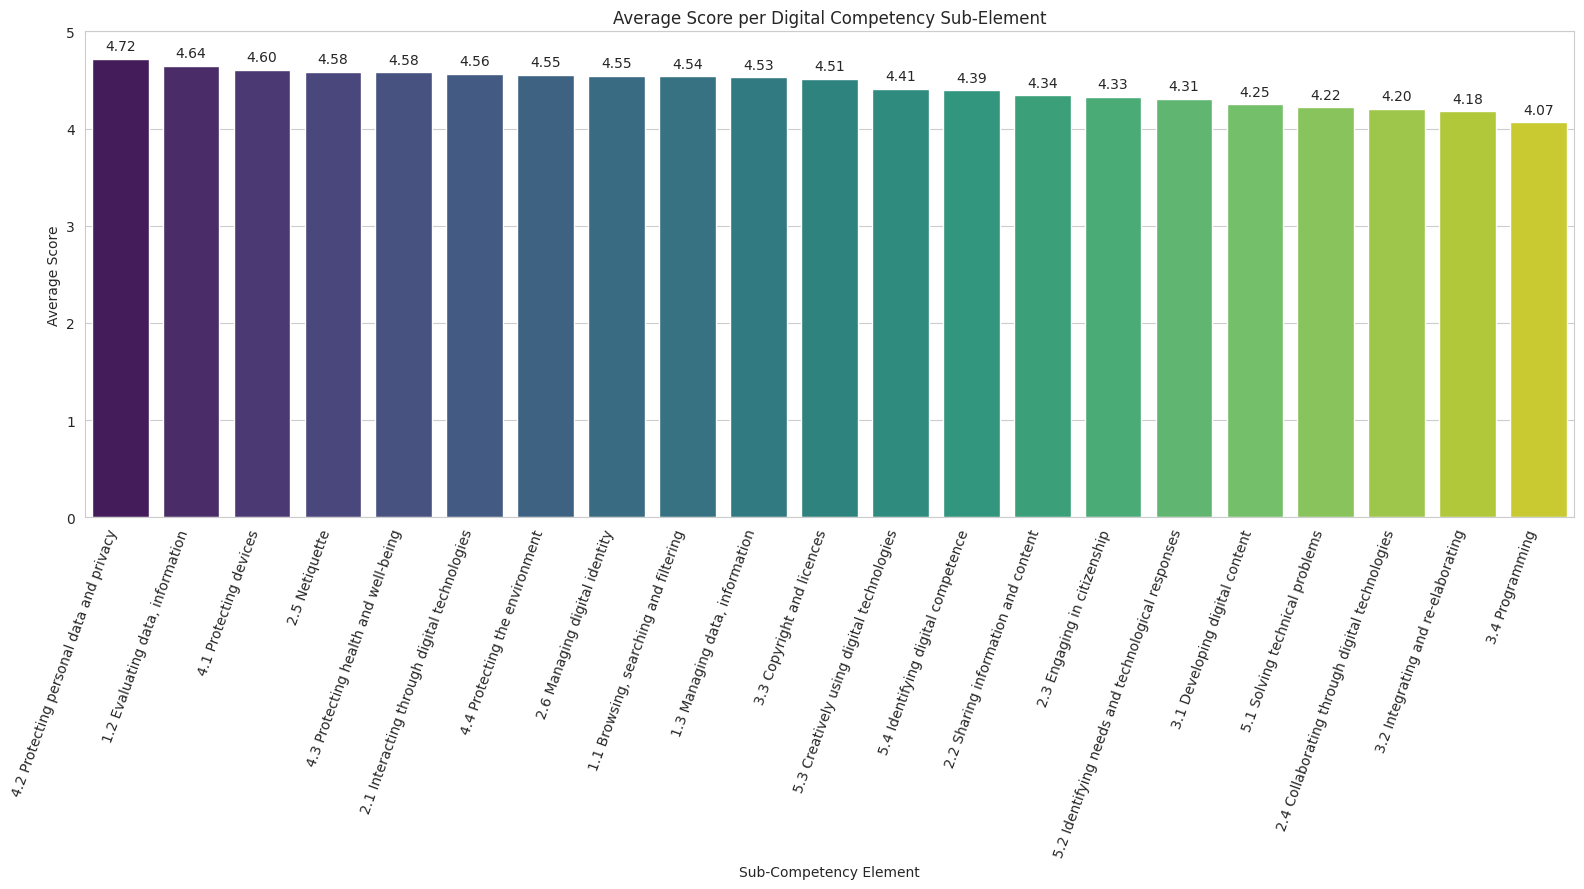

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x='Sub-Competency Element', y='Average Score', data=df_sub_competency_scores, palette='viridis', hue='Sub-Competency Element', legend=False)
plt.title('Average Score per Digital Competency Sub-Element')
plt.xlabel('Sub-Competency Element')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5
plt.xticks(rotation=70, ha='right') # Rotate and align labels for readability

# Add numerical labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()


Matriks Korelasi Antar 5 Dimensi Kompetensi Utama:


,Information and data literacy,Communication and collaboration,Digital content creation,Safety,Problem solving
Information and data literacy,1.000000,0.826350,0.627258,0.705908,0.660038
Communication and collaboration,0.826350,1.000000,0.814654,0.725529,0.793525
Digital content creation,0.627258,0.814654,1.000000,0.641313,0.831531
Safety,0.705908,0.725529,0.641313,1.000000,0.701692
Problem solving,0.660038,0.793525,0.831531,0.701692,1.000000


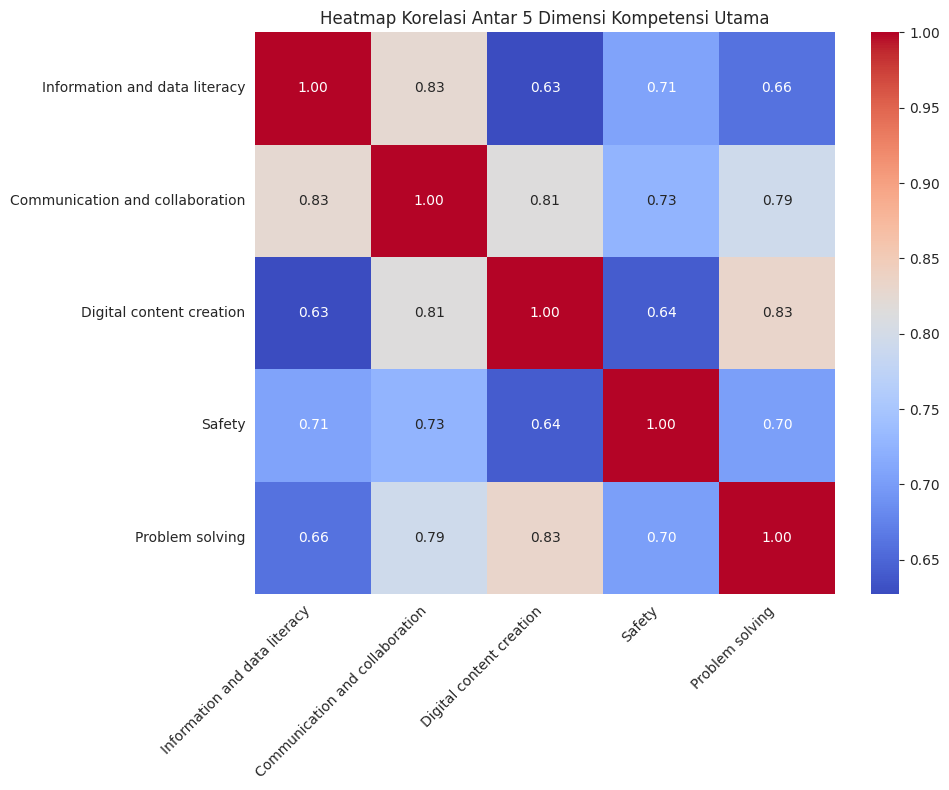

In [ ]:
# 1. Hitung skor rata-rata per individu untuk masing-masing dari 5 dimensi utama
df_individual_dimension_scores = pd.DataFrame()
for dimension, cols in competency_map_str.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        df_individual_dimension_scores[dimension] = df_scores[existing_cols].mean(axis=1)

# 2. Hitung matriks korelasi antar dimensi
corr_dimensions = df_individual_dimension_scores.corr()

print("\nMatriks Korelasi Antar 5 Dimensi Kompetensi Utama:")
display(corr_dimensions)

# 3. Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_dimensions, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar 5 Dimensi Kompetensi Utama')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Matriks Korelasi Antar 21 Sub-Elemen Kompetensi:


,"1.1 Browsing, searching and filtering","1.2 Evaluating data, information","1.3 Managing data, information",2.1 Interacting through digital technologies,2.2 Sharing information and content,2.3 Engaging in citizenship,2.4 Collaborating through digital technologies,2.5 Netiquette,2.6 Managing digital identity,3.1 Developing digital content,...,3.3 Copyright and licences,3.4 Programming,4.1 Protecting devices,4.2 Protecting personal data and privacy,4.3 Protecting health and well-being,4.4 Protecting the environment,5.1 Solving technical problems,5.2 Identifying needs and technological responses,5.3 Creatively using digital technologies,5.4 Identifying digital competence
"1.1 Browsing, searching and filtering",1.000000,0.517177,0.552071,0.617275,0.640324,0.606549,0.617039,0.551643,0.498712,0.469012,...,0.477033,0.352428,0.418253,0.349269,0.414022,0.487923,0.464209,0.507810,0.591103,0.544586
"1.2 Evaluating data, information",0.517177,1.000000,0.633901,0.543369,0.596323,0.529785,0.382312,0.592801,0.579266,0.443155,...,0.563423,0.352136,0.500263,0.340372,0.548386,0.598368,0.470236,0.476766,0.579797,0.562331
"1.3 Managing data, information",0.552071,0.633901,1.000000,0.599727,0.607838,0.573922,0.499830,0.617480,0.624742,0.434835,...,0.578567,0.396253,0.657292,0.446220,0.591156,0.595316,0.441658,0.397078,0.550458,0.554793
2.1 Interacting through digital technologies,0.617275,0.543369,0.599727,1.000000,0.663135,0.558155,0.641640,0.525811,0.428777,0.447036,...,0.573476,0.320217,0.467218,0.285886,0.562668,0.550538,0.422642,0.371333,0.461639,0.459180
2.2 Sharing information and content,0.640324,0.596323,0.607838,0.663135,1.000000,0.730384,0.731873,0.557666,0.599015,0.535042,...,0.612860,0.566398,0.466817,0.278407,0.515454,0.596480,0.597402,0.609421,0.644212,0.631613
2.3 Engaging in citizenship,0.606549,0.529785,0.573922,0.558155,0.730384,1.000000,0.722221,0.551316,0.545254,0.542913,...,0.625813,0.593802,0.418275,0.337913,0.513271,0.577841,0.581657,0.639231,0.653428,0.659632
2.4 Collaborating through digital technologies,0.617039,0.382312,0.499830,0.641640,0.731873,0.722221,1.000000,0.419417,0.490444,0.624779,...,0.502232,0.644746,0.317628,0.179481,0.392261,0.437479,0.509392,0.573655,0.546561,0.606972
2.5 Netiquette,0.551643,0.592801,0.617480,0.525811,0.557666,0.551316,0.419417,1.000000,0.759871,0.519222,...,0.730275,0.436913,0.677789,0.609705,0.674086,0.733951,0.624497,0.604507,0.698535,0.712891
2.6 Managing digital identity,0.498712,0.579266,0.624742,0.428777,0.599015,0.545254,0.490444,0.759871,1.000000,0.575423,...,0.674599,0.524770,0.669787,0.564865,0.617812,0.674326,0.543378,0.611240,0.678079,0.760051
3.1 Developing digital content,0.469012,0.443155,0.434835,0.447036,0.535042,0.542913,0.624779,0.519222,0.575423,1.000000,...,0.507864,0.673359,0.449467,0.308922,0.412544,0.505438,0.476238,0.656633,0.574768,0.667599


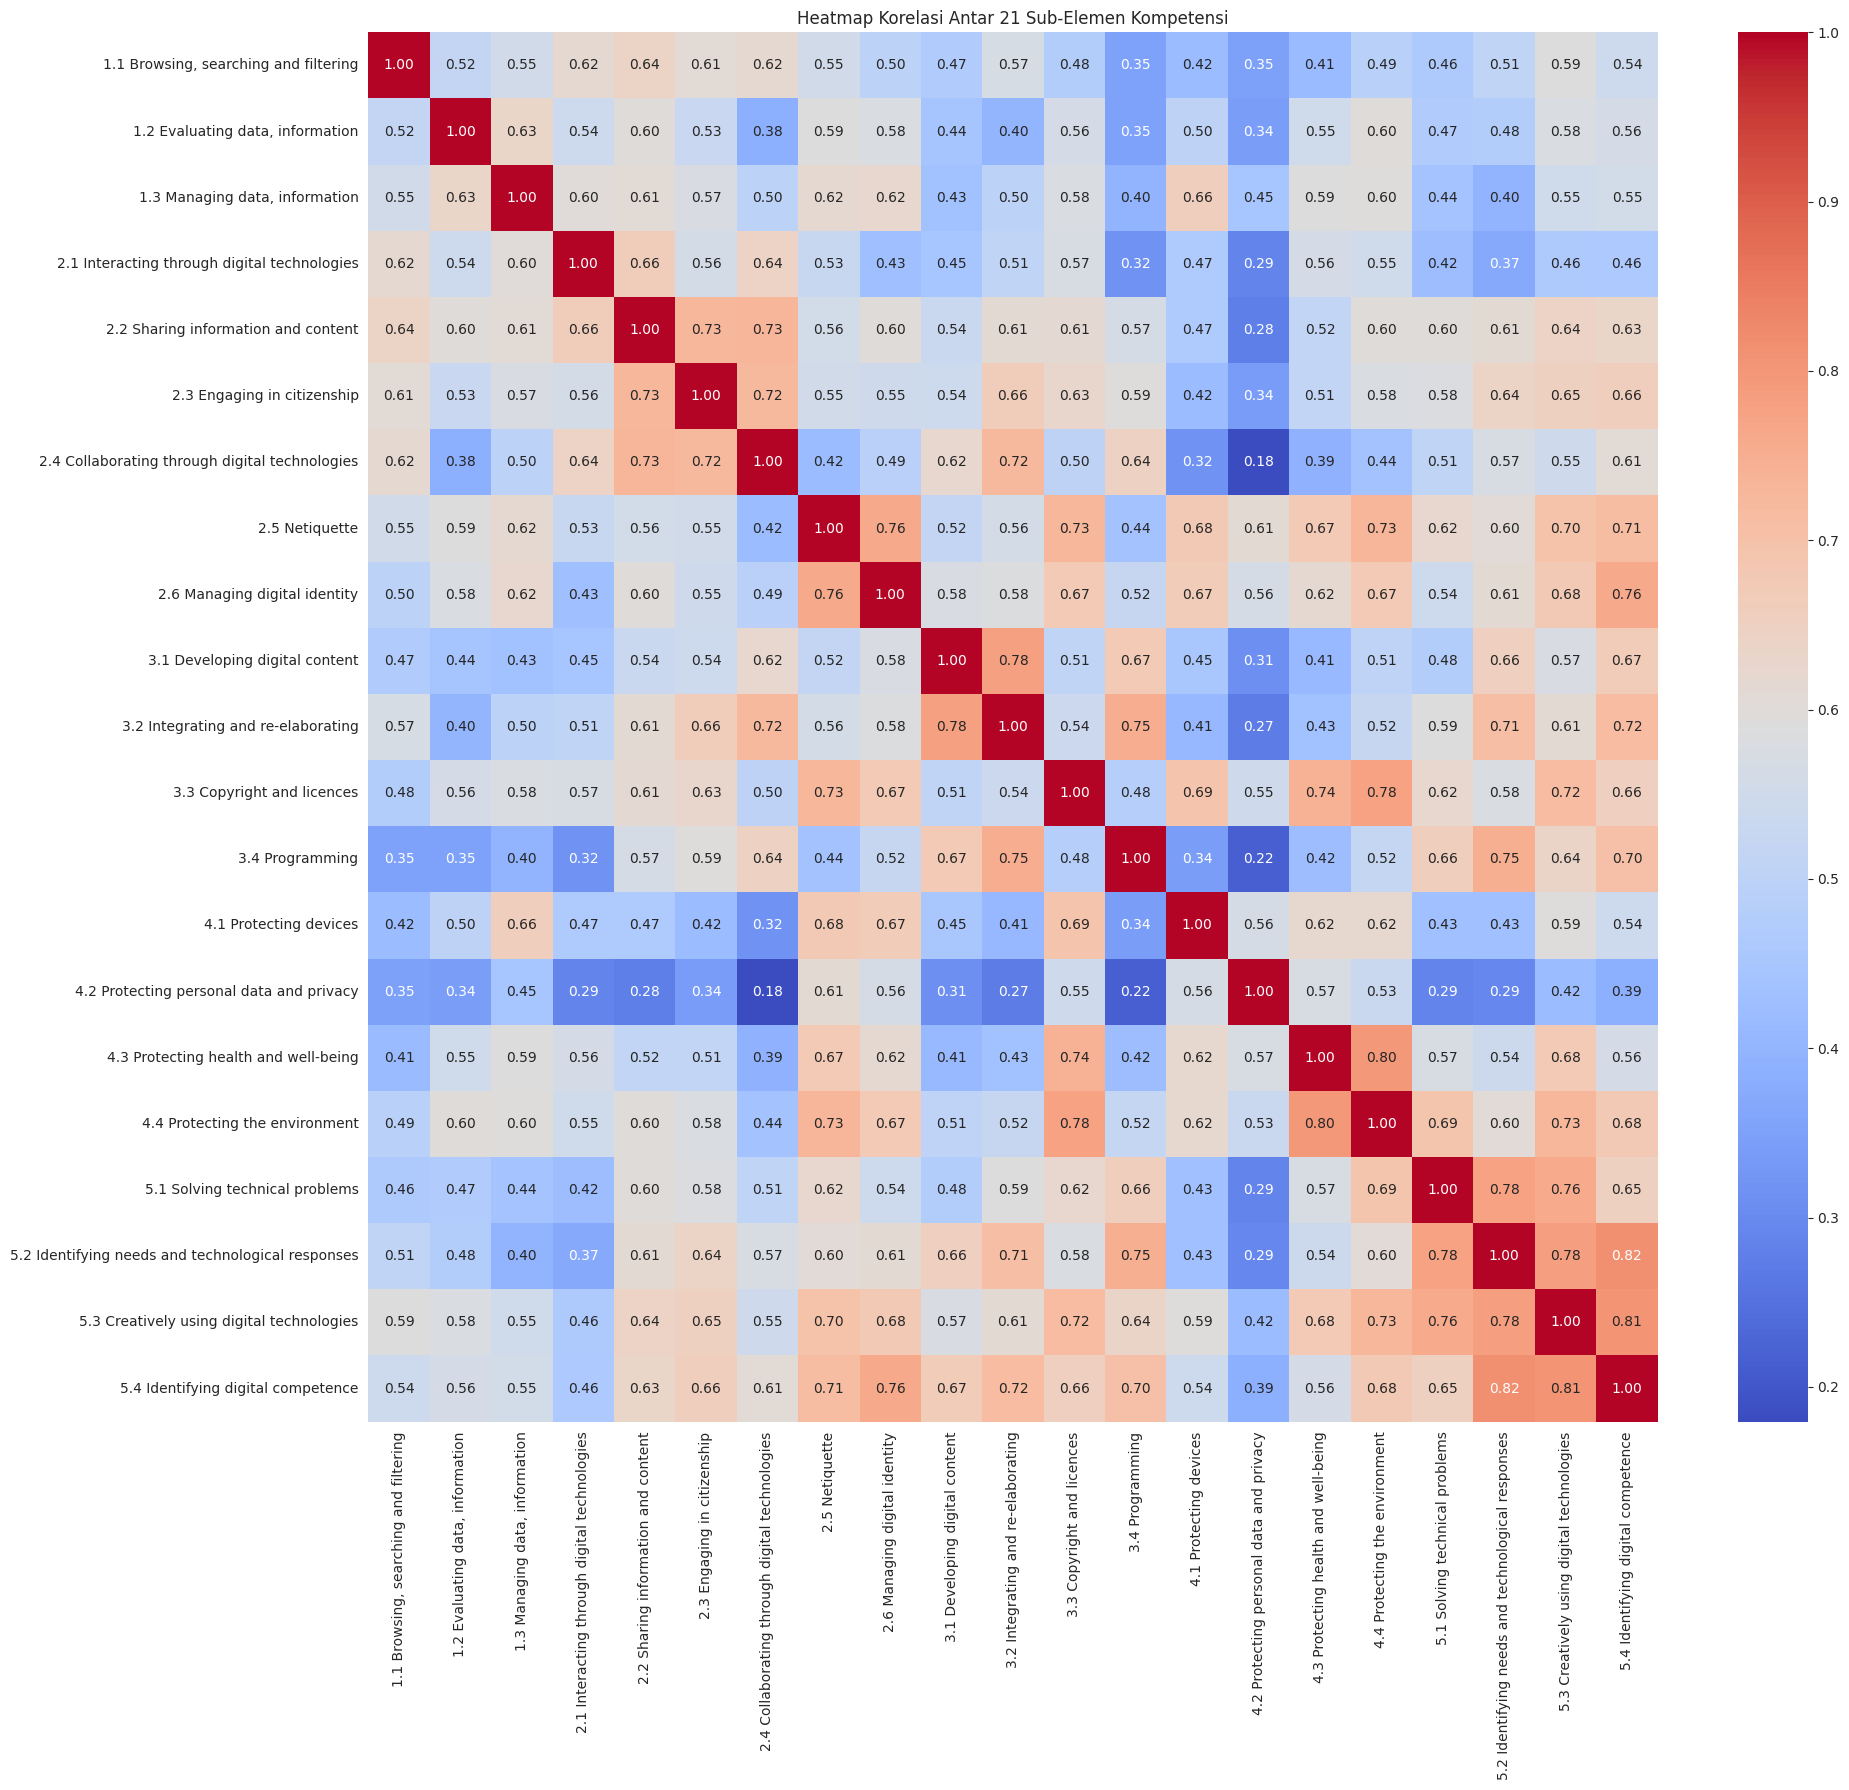

In [ ]:
# 1. Hitung skor rata-rata per individu untuk masing-masing dari 21 sub-elemen
df_individual_sub_element_scores = pd.DataFrame()
for sub_element, cols in sub_competency_map.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        df_individual_sub_element_scores[sub_element] = df_scores[existing_cols].mean(axis=1)

# 2. Hitung matriks korelasi antar sub-elemen
corr_sub_elements = df_individual_sub_element_scores.corr()

print("\nMatriks Korelasi Antar 21 Sub-Elemen Kompetensi:")
display(corr_sub_elements)

# 3. Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(20, 18)) # Ukuran yang lebih besar untuk banyak sub-elemen
sns.heatmap(corr_sub_elements, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=corr_sub_elements.columns, yticklabels=corr_sub_elements.columns)
plt.title('Heatmap Korelasi Antar 21 Sub-Elemen Kompetensi')
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Heatmap Korelasi Antar 5 Dimensi Kompetensi Utama

**Reasoning**: Untuk membuat heatmap korelasi antar 5 dimensi kompetensi utama, pertama saya akan menghitung skor rata-rata setiap dimensi untuk setiap individu. Kemudian, saya akan menghitung matriks korelasi dari skor-skor dimensi ini dan memvisualisasikannya dengan heatmap.


Matriks Korelasi Antar 5 Dimensi Kompetensi Utama:


,Information and data literacy,Communication and collaboration,Digital content creation,Safety,Problem solving
Information and data literacy,1.000000,0.826350,0.627258,0.705908,0.660038
Communication and collaboration,0.826350,1.000000,0.814654,0.725529,0.793525
Digital content creation,0.627258,0.814654,1.000000,0.641313,0.831531
Safety,0.705908,0.725529,0.641313,1.000000,0.701692
Problem solving,0.660038,0.793525,0.831531,0.701692,1.000000


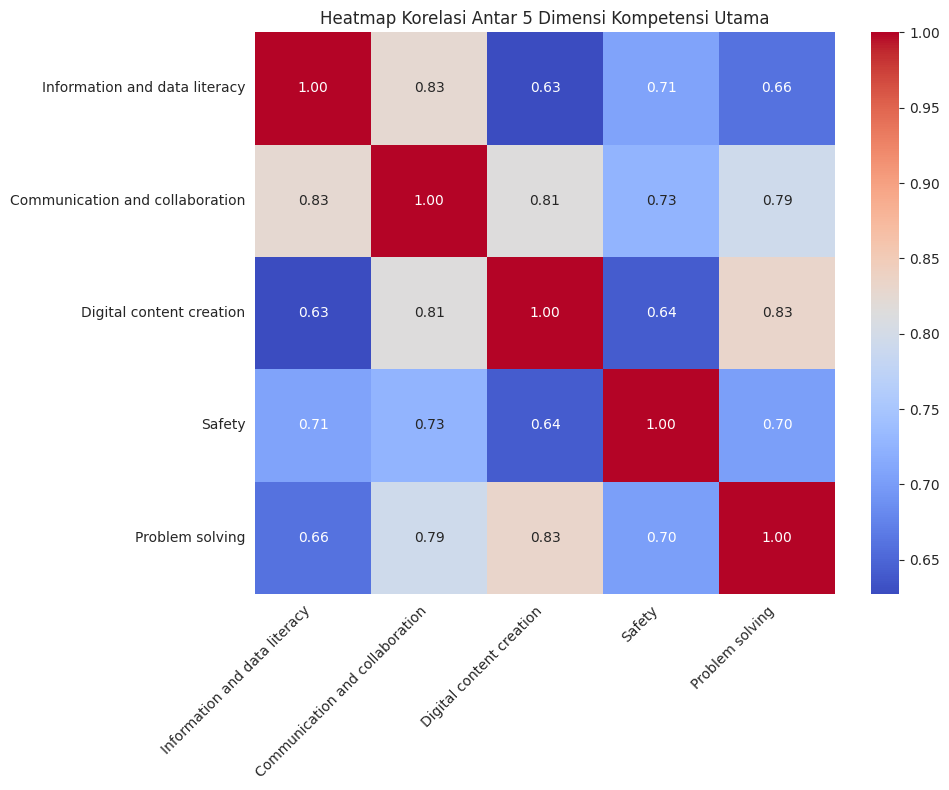

In [ ]:
# 1. Hitung skor rata-rata per individu untuk masing-masing dari 5 dimensi utama
df_individual_dimension_scores = pd.DataFrame()
for dimension, cols in competency_map_str.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        df_individual_dimension_scores[dimension] = df_scores[existing_cols].mean(axis=1)

# 2. Hitung matriks korelasi antar dimensi
corr_dimensions = df_individual_dimension_scores.corr()

print("\nMatriks Korelasi Antar 5 Dimensi Kompetensi Utama:")
display(corr_dimensions)

# 3. Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_dimensions, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar 5 Dimensi Kompetensi Utama')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Analisis Profil Kompetensi per Cluster

**Reasoning**: Untuk memahami profil kompetensi masing-masing cluster, saya akan menghitung rata-rata skor untuk setiap dari 5 dimensi kompetensi utama di setiap cluster. Ini akan menunjukkan karakteristik kompetensi digital yang berbeda antar kelompok.

In [ ]:
# Hitung skor rata-rata per individu untuk masing-masing dari 5 dimensi utama
df_individual_dimension_scores = pd.DataFrame()
for dimension, cols in competency_map_str.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        df_individual_dimension_scores[dimension] = df_scores[existing_cols].mean(axis=1)

# Gabungkan skor dimensi individu dengan informasi cluster
df_clustered_dimensions = pd.concat([df['Cluster'], df_individual_dimension_scores], axis=1)

# Hitung rata-rata skor dimensi per cluster
average_dimension_scores_per_cluster = df_clustered_dimensions.groupby('Cluster').mean().reset_index()

print("\nAverage Competency Dimension Scores per Cluster:")
display(average_dimension_scores_per_cluster)


Average Competency Dimension Scores per Cluster:


,Cluster,Information and data literacy,Communication and collaboration,Digital content creation,Safety,Problem solving
0,0,4.911565,4.869615,4.833333,4.930272,4.887755
1,1,4.081871,3.921053,3.686404,4.151316,3.703947
2,2,4.620915,4.356209,4.041667,4.674020,4.235294


**Reasoning**: Setelah menghitung rata-rata skor dimensi per cluster, saya akan memvisualisasikannya menggunakan diagram batang untuk memudahkan perbandingan profil kompetensi antar cluster.

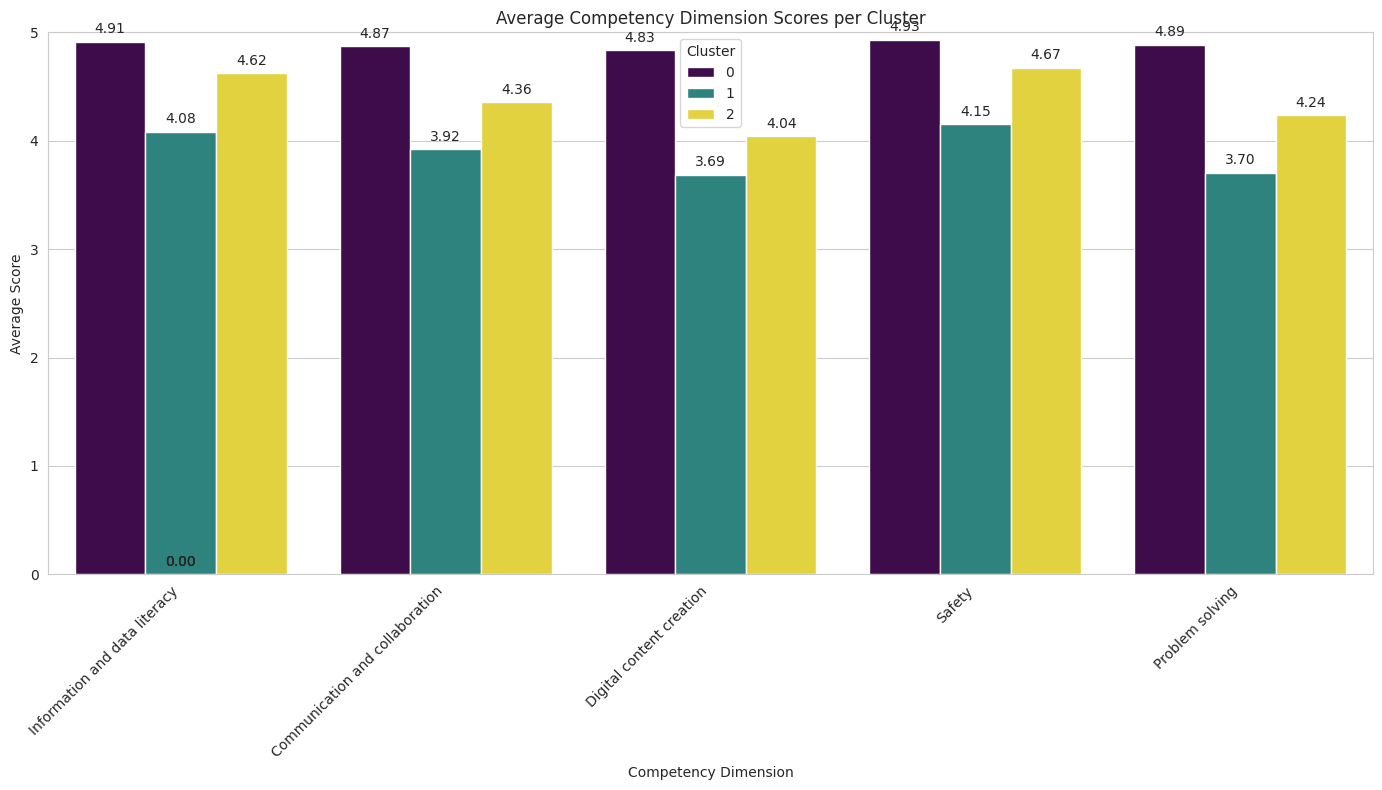

In [ ]:
# Melt the DataFrame for easier plotting with seaborn
df_plot = average_dimension_scores_per_cluster.melt(id_vars='Cluster', var_name='Competency Dimension', value_name='Average Score')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Competency Dimension', y='Average Score', hue='Cluster', data=df_plot, palette='viridis')
plt.title('Average Competency Dimension Scores per Cluster')
plt.xlabel('Competency Dimension')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5
plt.xticks(rotation=45, ha='right')

# Add numerical labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Heatmap Korelasi Antar 21 Sub-Elemen Kompetensi

**Reasoning**: Selanjutnya, saya akan menghitung skor rata-rata setiap sub-elemen untuk setiap individu. Setelah itu, saya akan membuat matriks korelasi dari skor-skor sub-elemen ini dan memvisualisasikannya menggunakan heatmap untuk mendapatkan detail korelasi yang lebih granular.


Matriks Korelasi Antar 21 Sub-Elemen Kompetensi:


,"1.1 Browsing, searching and filtering","1.2 Evaluating data, information","1.3 Managing data, information",2.1 Interacting through digital technologies,2.2 Sharing information and content,2.3 Engaging in citizenship,2.4 Collaborating through digital technologies,2.5 Netiquette,2.6 Managing digital identity,3.1 Developing digital content,...,3.3 Copyright and licences,3.4 Programming,4.1 Protecting devices,4.2 Protecting personal data and privacy,4.3 Protecting health and well-being,4.4 Protecting the environment,5.1 Solving technical problems,5.2 Identifying needs and technological responses,5.3 Creatively using digital technologies,5.4 Identifying digital competence
"1.1 Browsing, searching and filtering",1.000000,0.517177,0.552071,0.617275,0.640324,0.606549,0.617039,0.551643,0.498712,0.469012,...,0.477033,0.352428,0.418253,0.349269,0.414022,0.487923,0.464209,0.507810,0.591103,0.544586
"1.2 Evaluating data, information",0.517177,1.000000,0.633901,0.543369,0.596323,0.529785,0.382312,0.592801,0.579266,0.443155,...,0.563423,0.352136,0.500263,0.340372,0.548386,0.598368,0.470236,0.476766,0.579797,0.562331
"1.3 Managing data, information",0.552071,0.633901,1.000000,0.599727,0.607838,0.573922,0.499830,0.617480,0.624742,0.434835,...,0.578567,0.396253,0.657292,0.446220,0.591156,0.595316,0.441658,0.397078,0.550458,0.554793
2.1 Interacting through digital technologies,0.617275,0.543369,0.599727,1.000000,0.663135,0.558155,0.641640,0.525811,0.428777,0.447036,...,0.573476,0.320217,0.467218,0.285886,0.562668,0.550538,0.422642,0.371333,0.461639,0.459180
2.2 Sharing information and content,0.640324,0.596323,0.607838,0.663135,1.000000,0.730384,0.731873,0.557666,0.599015,0.535042,...,0.612860,0.566398,0.466817,0.278407,0.515454,0.596480,0.597402,0.609421,0.644212,0.631613
2.3 Engaging in citizenship,0.606549,0.529785,0.573922,0.558155,0.730384,1.000000,0.722221,0.551316,0.545254,0.542913,...,0.625813,0.593802,0.418275,0.337913,0.513271,0.577841,0.581657,0.639231,0.653428,0.659632
2.4 Collaborating through digital technologies,0.617039,0.382312,0.499830,0.641640,0.731873,0.722221,1.000000,0.419417,0.490444,0.624779,...,0.502232,0.644746,0.317628,0.179481,0.392261,0.437479,0.509392,0.573655,0.546561,0.606972
2.5 Netiquette,0.551643,0.592801,0.617480,0.525811,0.557666,0.551316,0.419417,1.000000,0.759871,0.519222,...,0.730275,0.436913,0.677789,0.609705,0.674086,0.733951,0.624497,0.604507,0.698535,0.712891
2.6 Managing digital identity,0.498712,0.579266,0.624742,0.428777,0.599015,0.545254,0.490444,0.759871,1.000000,0.575423,...,0.674599,0.524770,0.669787,0.564865,0.617812,0.674326,0.543378,0.611240,0.678079,0.760051
3.1 Developing digital content,0.469012,0.443155,0.434835,0.447036,0.535042,0.542913,0.624779,0.519222,0.575423,1.000000,...,0.507864,0.673359,0.449467,0.308922,0.412544,0.505438,0.476238,0.656633,0.574768,0.667599


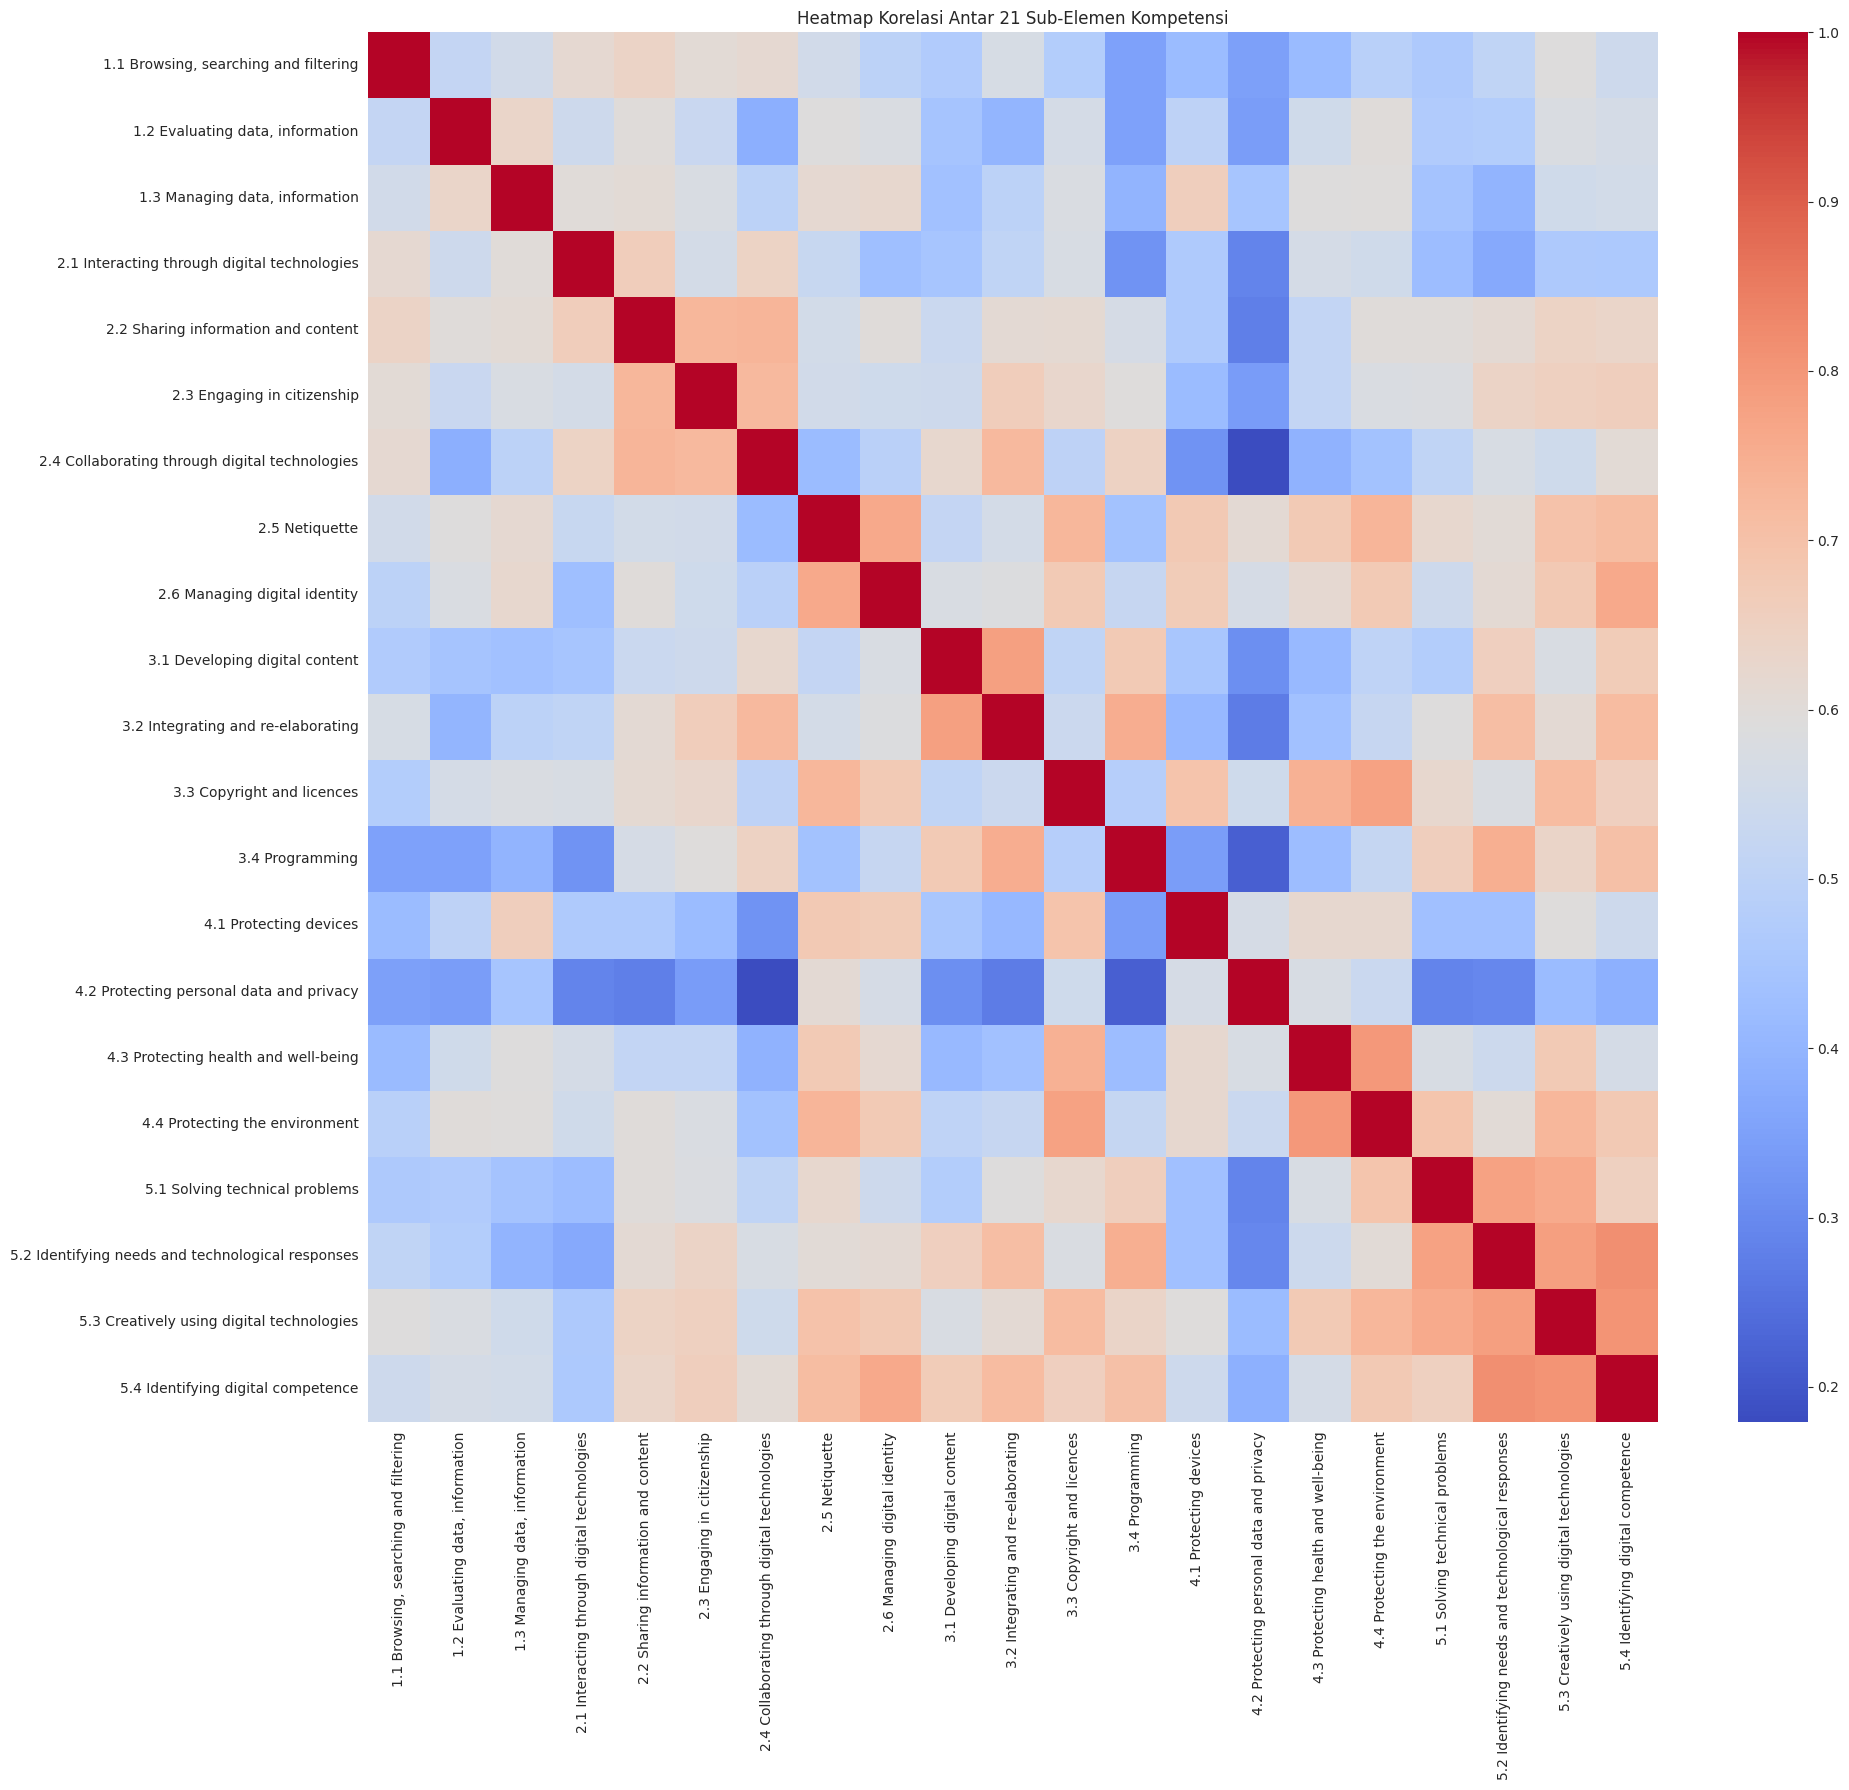

In [ ]:
# 1. Hitung skor rata-rata per individu untuk masing-masing dari 21 sub-elemen
df_individual_sub_element_scores = pd.DataFrame()
for sub_element, cols in sub_competency_map.items():
    existing_cols = [col for col in cols if col in df_scores.columns]
    if existing_cols:
        df_individual_sub_element_scores[sub_element] = df_scores[existing_cols].mean(axis=1)

# 2. Hitung matriks korelasi antar sub-elemen
corr_sub_elements = df_individual_sub_element_scores.corr()

print("\nMatriks Korelasi Antar 21 Sub-Elemen Kompetensi:")
display(corr_sub_elements)

# 3. Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(20, 18)) # Ukuran yang lebih besar untuk banyak sub-elemen
sns.heatmap(corr_sub_elements, annot=False, cmap='coolwarm', fmt=".2f",
            xticklabels=corr_sub_elements.columns, yticklabels=corr_sub_elements.columns)
plt.title('Heatmap Korelasi Antar 21 Sub-Elemen Kompetensi')
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Analisis Skor 'Digital Content Creation' per Cluster

**Reasoning**: Untuk mendapatkan pemahaman yang berbeda mengenai faktor-faktor yang mungkin mempengaruhi skor 'Digital Content Creation' setelah analisis regresi awal tidak menunjukkan signifikansi demografis, saya akan menganalisis rata-rata skor 'Digital Content Creation' berdasarkan cluster yang telah terbentuk sebelumnya. Ini akan membantu mengidentifikasi apakah ada perbedaan profil 'Digital Content Creation' antar kelompok kompetensi digital.

In [ ]:
# Pastikan 'Digital_Content_Creation_Score' sudah ada di df
# (telah dibuat di langkah sebelumnya)
if 'Digital_Content_Creation_Score' not in df.columns:
    # Recalculate if it somehow got lost (shouldn't happen with current flow)
    digital_content_cols = competency_map_str['Digital content creation']
    existing_digital_content_cols = [col for col in digital_content_cols if col in df.columns]
    if existing_digital_content_cols:
        df['Digital_Content_Creation_Score'] = df[existing_digital_content_cols].mean(axis=1)
    else:
        print("Error: Kolom untuk 'Digital content creation' tidak ditemukan di DataFrame.")

# Hitung rata-rata skor 'Digital Content Creation' per cluster
average_dcc_per_cluster = df.groupby('Cluster')['Digital_Content_Creation_Score'].mean().reset_index()

print("\nAverage 'Digital Content Creation' Score per Cluster:")
display(average_dcc_per_cluster)


Average 'Digital Content Creation' Score per Cluster:


,Cluster,Digital_Content_Creation_Score
0,0,4.833333
1,1,3.686404
2,2,4.041667


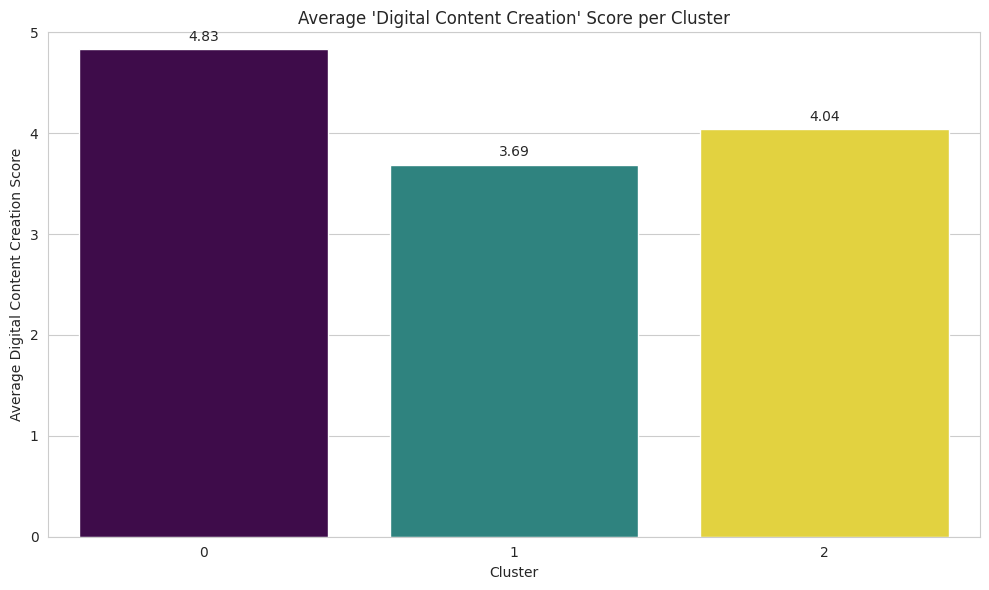

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Digital_Content_Creation_Score', data=average_dcc_per_cluster, palette='viridis', hue='Cluster', legend=False)
plt.title("Average 'Digital Content Creation' Score per Cluster")
plt.xlabel('Cluster')
plt.ylabel('Average Digital Content Creation Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5

# Add numerical labels on top of each bar
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan analisis 'Average Competency Dimension Scores per Cluster' yang telah kita lakukan, kita bisa mendeskripsikan ketiga cluster tersebut sebagai berikut:
1. Cluster 0: Kelompok 'Pakar Digital' (Digital Experts)
•	Karakteristik: Cluster ini menunjukkan rata-rata skor yang sangat tinggi dan merata di semua dimensi kompetensi digital. Skor mereka untuk setiap dimensi umumnya berada di atas 4.8 (dari skala 5), bahkan beberapa sangat mendekati 5.0.
•	Profil: Pegawai dalam cluster ini memiliki penguasaan yang luar biasa terhadap pengetahuan, keterampilan, dan perilaku terkait teknologi digital. Mereka adalah 'pakar' atau 'juara' digital di Bank X.
•	Implikasi: Kelompok ini dapat menjadi aset berharga sebagai mentor, early adopters teknologi baru, atau bahkan sebagai agen perubahan digital di dalam organisasi. Mereka mungkin tidak membutuhkan pelatihan dasar, melainkan peluang untuk inovasi atau peran kepemimpinan digital.
2. Cluster 1: Kelompok 'Pembelajar Digital' (Digital Learners/Novices)
•	Karakteristik: Cluster ini secara konsisten menunjukkan rata-rata skor yang paling rendah di semua dimensi kompetensi digital dibandingkan dengan cluster lainnya. Skor mereka umumnya berada di bawah 4.2.
•	Profil: Pegawai di cluster ini adalah mereka yang paling membutuhkan pengembangan kompetensi digital. Mereka mungkin memiliki kesenjangan pengetahuan dan keterampilan yang signifikan di sebagian besar area.
•	Implikasi: Kelompok ini harus menjadi target utama untuk program pelatihan dasar dan intensif yang mencakup berbagai dimensi kompetensi. Penting untuk mengidentifikasi hambatan belajar mereka (misalnya, motivasi, akses, atau ketakutan terhadap teknologi) untuk merancang intervensi yang paling efektif.
3. Cluster 2: Kelompok 'Pengguna Digital Berkembang' (Developing Digital Users)
•	Karakteristik: Cluster ini menunjukkan profil kompetensi yang lebih baik daripada Cluster 1, tetapi belum semaksimal Cluster 0. Mereka memiliki kekuatan di beberapa dimensi dan kelemahan relatif di dimensi lain.
•	Profil: Skor mereka untuk dimensi Safety dan Information and data literacy cenderung tinggi (mendekati atau di atas 4.6), menunjukkan fondasi dan kesadaran yang baik. Namun, mereka cenderung memiliki skor yang lebih rendah di dimensi seperti Digital content creation (sekitar 4.0) dan Problem solving (sekitar 4.2) dibandingkan dengan Cluster 0.
•	Implikasi: Kelompok ini memerlukan pelatihan yang lebih spesifik dan terarah untuk meningkatkan keterampilan mereka di area-area yang masih lemah. Mereka tidak membutuhkan pelatihan dari nol, tetapi lebih ke peningkatan keterampilan pada dimensi yang lebih aplikatif dan kreatif.


In [ ]:
# 1. Ekstrak kolom untuk 'Communication and collaboration' dari competency_map_str
communication_cols = competency_map_str['Communication and collaboration']

# 2. Filter df_scores untuk hanya menyertakan kolom 'Communication and collaboration'
df_communication_scores = df_scores[communication_cols]

# 3. Hitung rata-rata skor untuk setiap item dalam dimensi ini
average_communication_item_scores = df_communication_scores.mean().sort_values(ascending=True)

print("\nAverage Score per 'Communication and collaboration' Item (Lowest to Highest):")
print(average_communication_item_scores.head(10)) # Display top 10 lowest scores
print("\nAverage Score per 'Communication and collaboration' Item (Highest to Lowest):")
print(average_communication_item_scores.tail(10)) # Display top 10 highest scores


Average Score per 'Communication and collaboration' Item (Lowest to Highest):
20    4.033058
21    4.157025
17    4.198347
26    4.223140
14    4.247934
15    4.355372
18    4.388430
16    4.396694
19    4.413223
13    4.429752
dtype: float64

Average Score per 'Communication and collaboration' Item (Highest to Lowest):
19    4.413223
13    4.429752
12    4.446281
24    4.520661
23    4.545455
10    4.570248
27    4.644628
11    4.669421
22    4.685950
25    4.768595
dtype: float64


**Reasoning**: Setelah mengidentifikasi item-item dengan rata-rata skor terendah dalam dimensi 'Communication and collaboration', saya akan memvisualisasikannya menggunakan bar chart untuk memberikan gambaran yang lebih jelas.

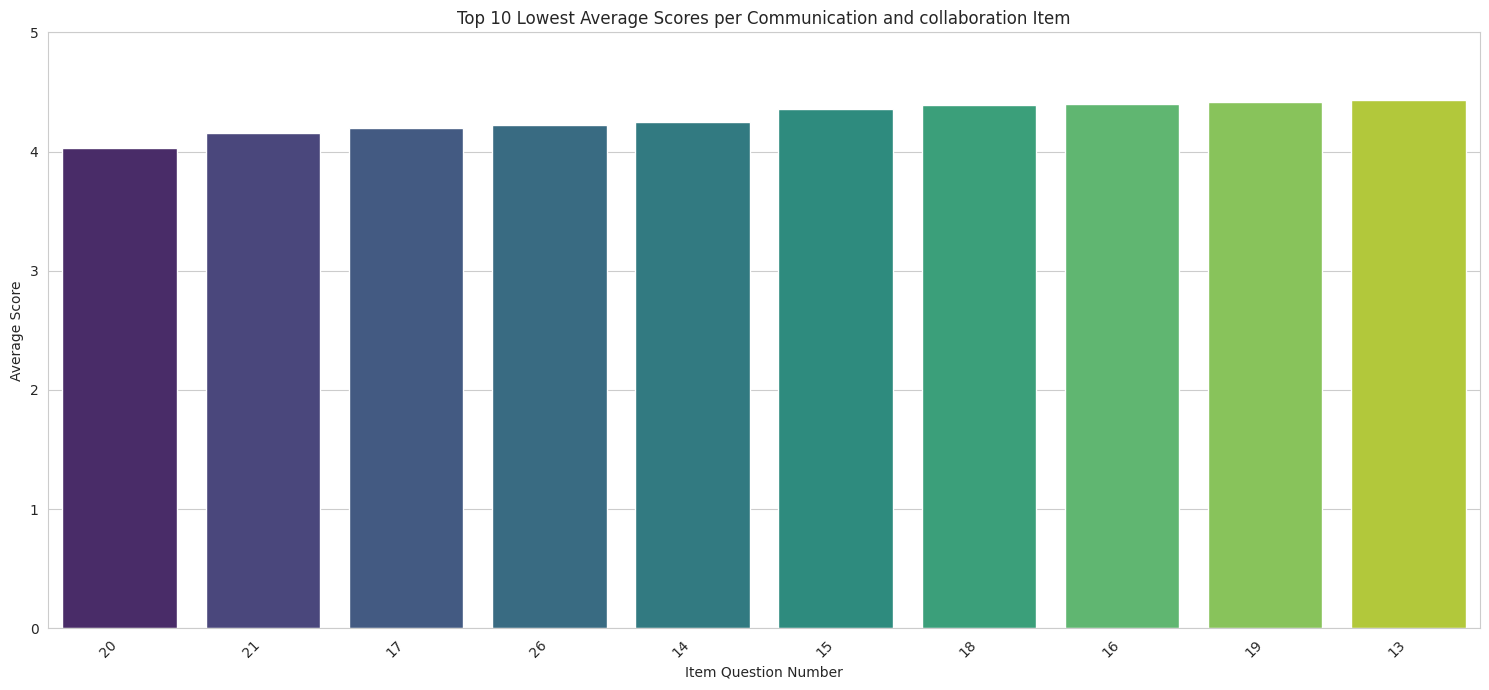

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=average_communication_item_scores.head(10).index, y=average_communication_item_scores.head(10).values, palette='viridis', hue=average_communication_item_scores.head(10).index, legend=False)
plt.title('Top 10 Lowest Average Scores per Communication and collaboration Item')
plt.xlabel('Item Question Number')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming Likert scale 1-5
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()